In [1]:
import pandas as pd
retail_data=pd.read_csv('Retail_Data.csv')

In [2]:
retail_data.head()

customer_id  age  gender income_bracket loyalty_program  membership_years  \
0            2   69  Female         medium              No                 2   
1            3   46  Female            low              No                 5   
2            4   32  Female            low              No                 0   
3            5   60  Female            low             Yes                 7   
4            6   25   Other         medium             Yes                 4   

  marital_status  number_of_children education_level     occupation  ...  \
0        Married                 2.0             PhD     Unemployed  ...   
1        Married                 3.0      Bachelor's  Self-Employed  ...   
2       Divorced                 2.0        Master's       Employed  ...   
3       Divorced                 2.0      Bachelor's       Employed  ...   
4       Divorced                 6.0      Bachelor's     Unemployed  ...   

   store_state distance_to_store  holiday_season  season  weekend  \
0      State X             62.56              No  Summer      Yes   
1      State Y             83.04             Yes  Winter      Yes   
2      State Z             50.43             Yes  Winter       No   
3      State X             36.55             Yes  Summer      Yes   
4      State X             66.71             Yes  Summer       No   

   customer_support_calls  email_subscriptions app_usage website_visits  \
0                       6                   No      high             40   
1                       2                  Yes       low             89   
2                      12                   No       low             12   
3                       3                   No    medium             31   
4                       4                  Yes    medium             80   

   social_media_engagement  
0                   medium  
1                   medium  
2                      low  
3                      low  
4                     high  

[5 rows x 72 columns]

In [3]:
retail_data.head()

customer_id  age  gender income_bracket loyalty_program  membership_years  \
0            2   69  Female         medium              No                 2   
1            3   46  Female            low              No                 5   
2            4   32  Female            low              No                 0   
3            5   60  Female            low             Yes                 7   
4            6   25   Other         medium             Yes                 4   

  marital_status  number_of_children education_level     occupation  ...  \
0        Married                 2.0             PhD     Unemployed  ...   
1        Married                 3.0      Bachelor's  Self-Employed  ...   
2       Divorced                 2.0        Master's       Employed  ...   
3       Divorced                 2.0      Bachelor's       Employed  ...   
4       Divorced                 6.0      Bachelor's     Unemployed  ...   

   store_state distance_to_store  holiday_season  season  weekend  \
0      State X             62.56              No  Summer      Yes   
1      State Y             83.04             Yes  Winter      Yes   
2      State Z             50.43             Yes  Winter       No   
3      State X             36.55             Yes  Summer      Yes   
4      State X             66.71             Yes  Summer       No   

   customer_support_calls  email_subscriptions app_usage website_visits  \
0                       6                   No      high             40   
1                       2                  Yes       low             89   
2                      12                   No       low             12   
3                       3                   No    medium             31   
4                       4                  Yes    medium             80   

   social_media_engagement  
0                   medium  
1                   medium  
2                      low  
3                      low  
4                     high  

[5 rows x 72 columns]

In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895036 entries, 0 to 895035
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   customer_id                895036 non-null  int64  
 1   age                        895036 non-null  int64  
 2   gender                     850291 non-null  object 
 3   income_bracket             895036 non-null  object 
 4   loyalty_program            895036 non-null  object 
 5   membership_years           895036 non-null  int64  
 6   marital_status             895036 non-null  object 
 7   number_of_children         850291 non-null  float64
 8   education_level            895036 non-null  object 
 9   occupation                 895036 non-null  object 
 10  transaction_id             895036 non-null  int64  
 11  transaction_date           894985 non-null  object 
 12  product_id                 895036 non-null  int64  
 13  product_category           89

In [5]:
# Convert transaction_date to datetime if not already done (we already did this, but verifying)
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'], errors='coerce')

# Sort the DataFrame by transaction_date
retail_data = retail_data.sort_values(by='transaction_date')

# # Display the first few rows to verify
# print(retail_data[['transaction_date', 'total_sales']].head())

In [6]:
# Create a new column 'transaction_month' as a string in the format 'YYYY-MM'
retail_data['transaction_month'] = retail_data['transaction_date'].apply(lambda x: x.strftime('%Y-%m') if pd.notnull(x) else None)

# Aggregate total sales by transaction_month
monthly_sales = retail_data.groupby('transaction_month')['total_sales'].sum().reset_index()

# # Display the aggregated monthly sales
# print(monthly_sales.head())


### Monthly sales plot

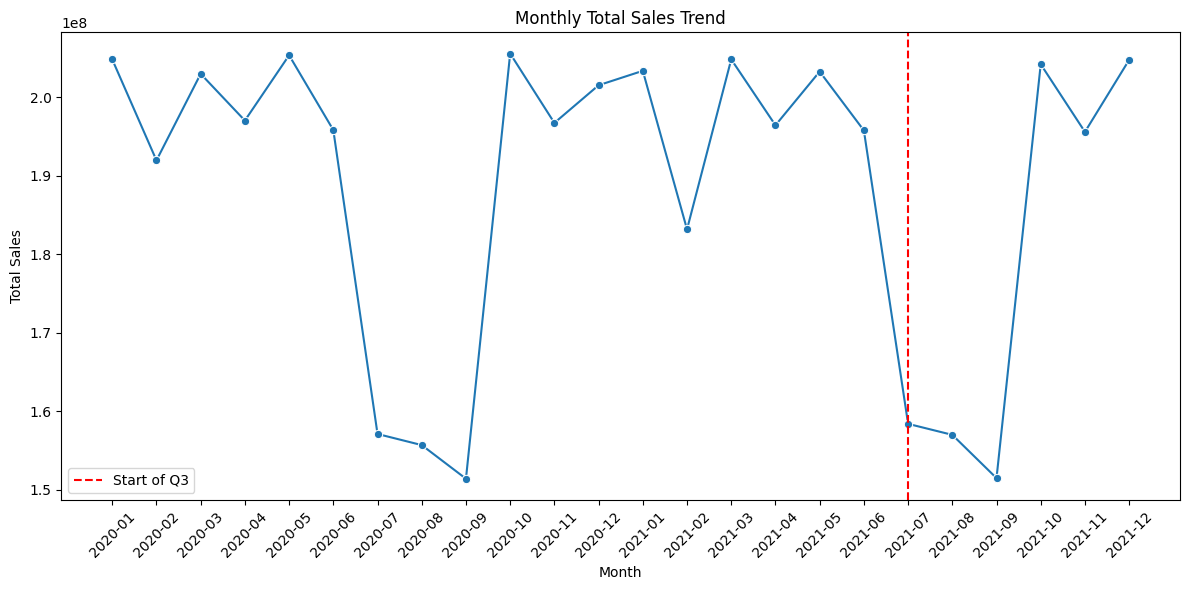

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='transaction_month', y='total_sales', marker='o')

plt.xticks(rotation=45)
plt.title('Monthly Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Optionally, mark Q3 start if you know the specific month (adjust accordingly)
# For example, if Q3 starts in July 2021:
plt.axvline(x='2021-07', color='red', linestyle='--', label='Start of Q3')
plt.legend()

plt.tight_layout()
plt.show()


### Quarterly plot by state

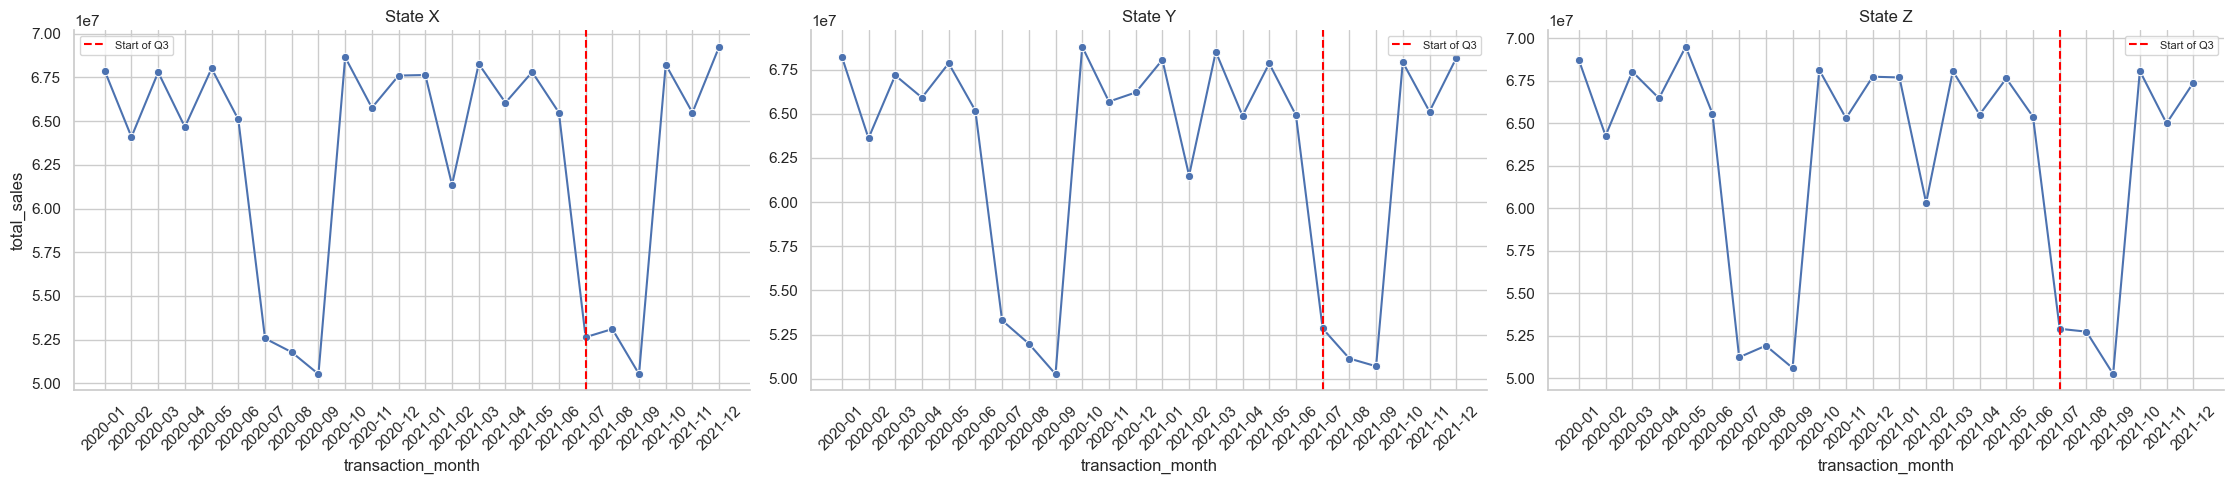

In [8]:
## Analysis by state
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales by store_state and transaction_month
state_monthly_sales = retail_data.groupby(['store_state', 'transaction_month'])['total_sales'].sum().reset_index()

# Sort the month column to ensure correct ordering (if needed, you can convert to datetime)
state_monthly_sales = state_monthly_sales.sort_values(by=['store_state', 'transaction_month'])

# Create a FacetGrid for states
sns.set(style="whitegrid")
g_state = sns.FacetGrid(state_monthly_sales, col="store_state", col_wrap=3, height=5, aspect=1.5, sharey=False)
g_state.map_dataframe(sns.lineplot, x="transaction_month", y="total_sales", marker="o")

# Customize each subplot
for ax in g_state.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    # Mark the start of Q3; adjust the label if your data uses different year/month formats.
    ax.axvline(x='2021-07', color='red', linestyle='--', label='Start of Q3')
    ax.legend(fontsize=8)
    
g_state.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()


### Quarterly plot by city

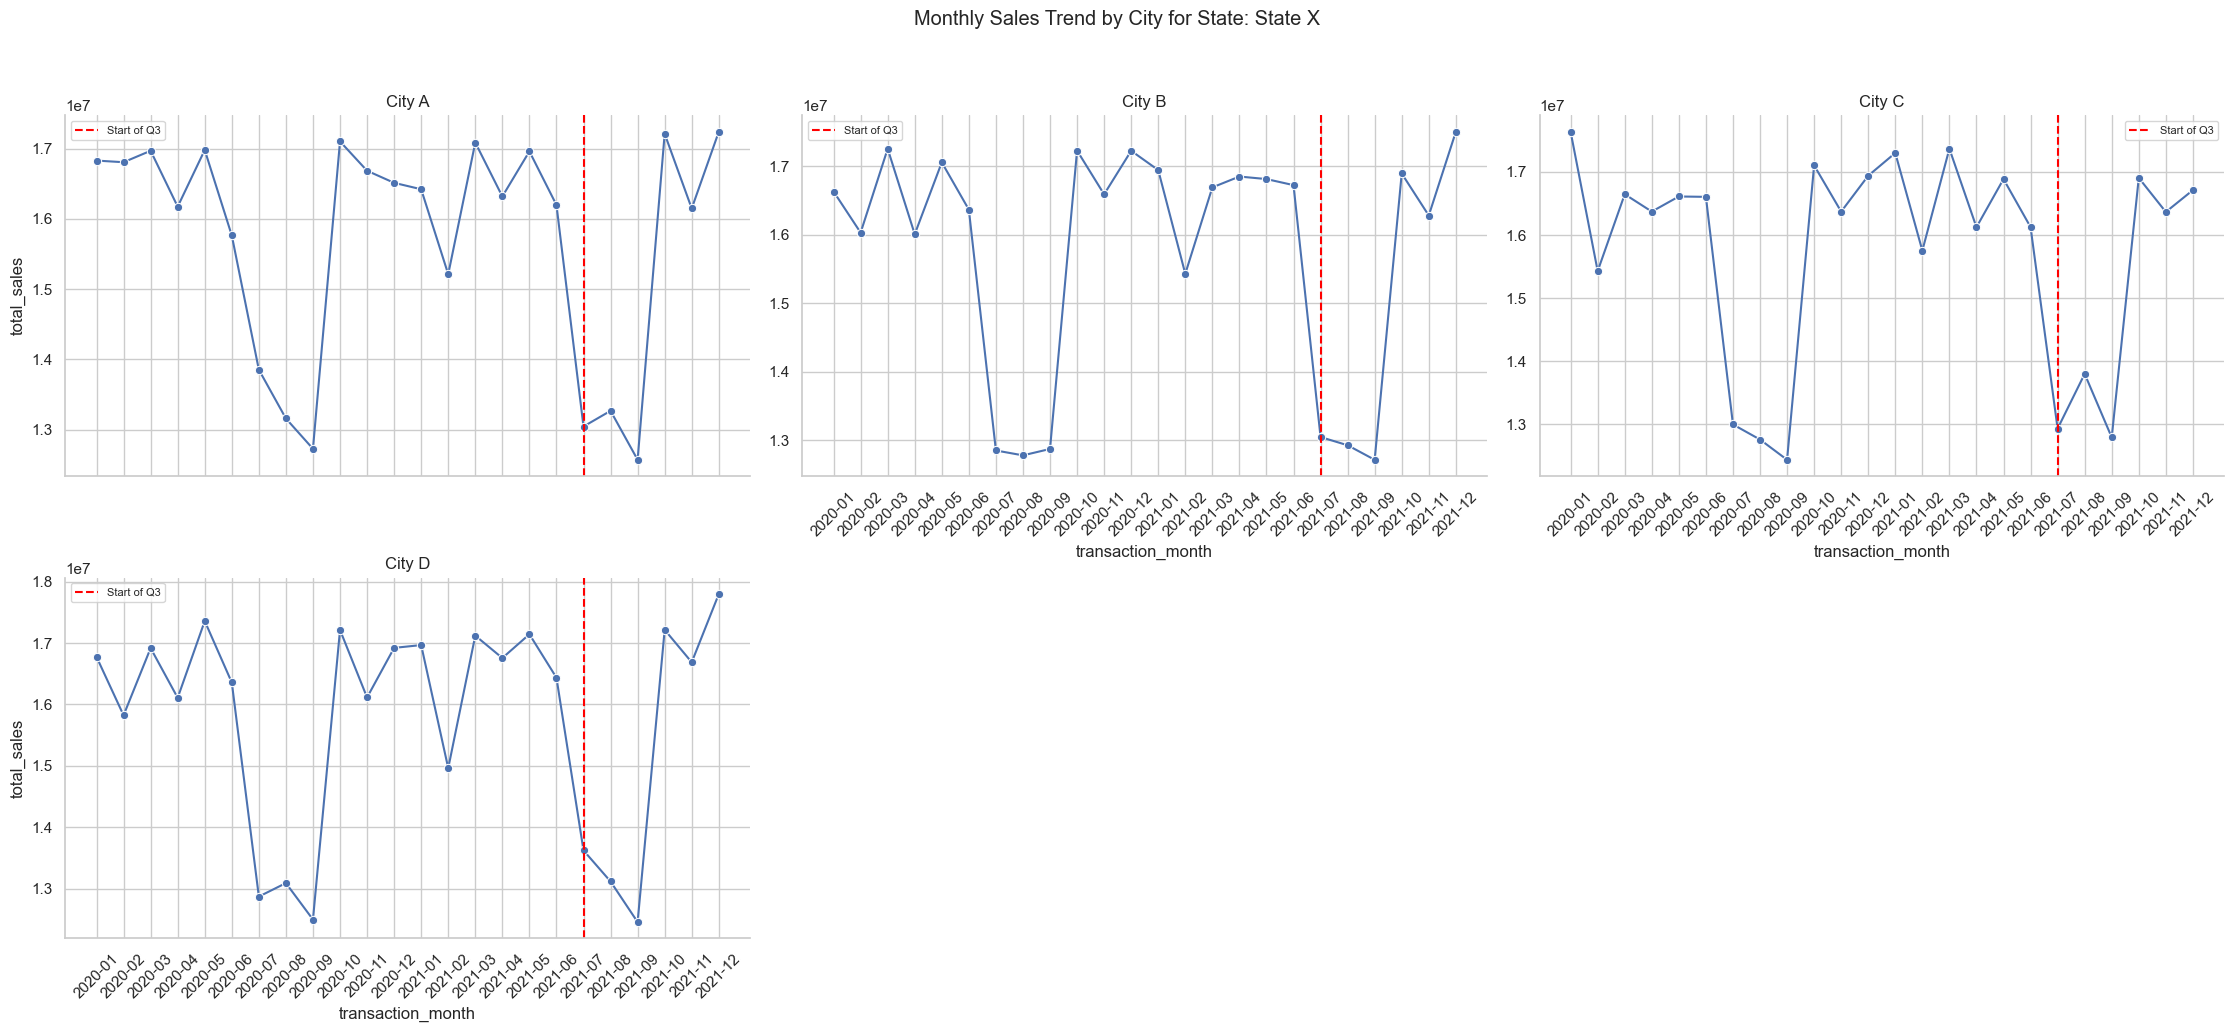

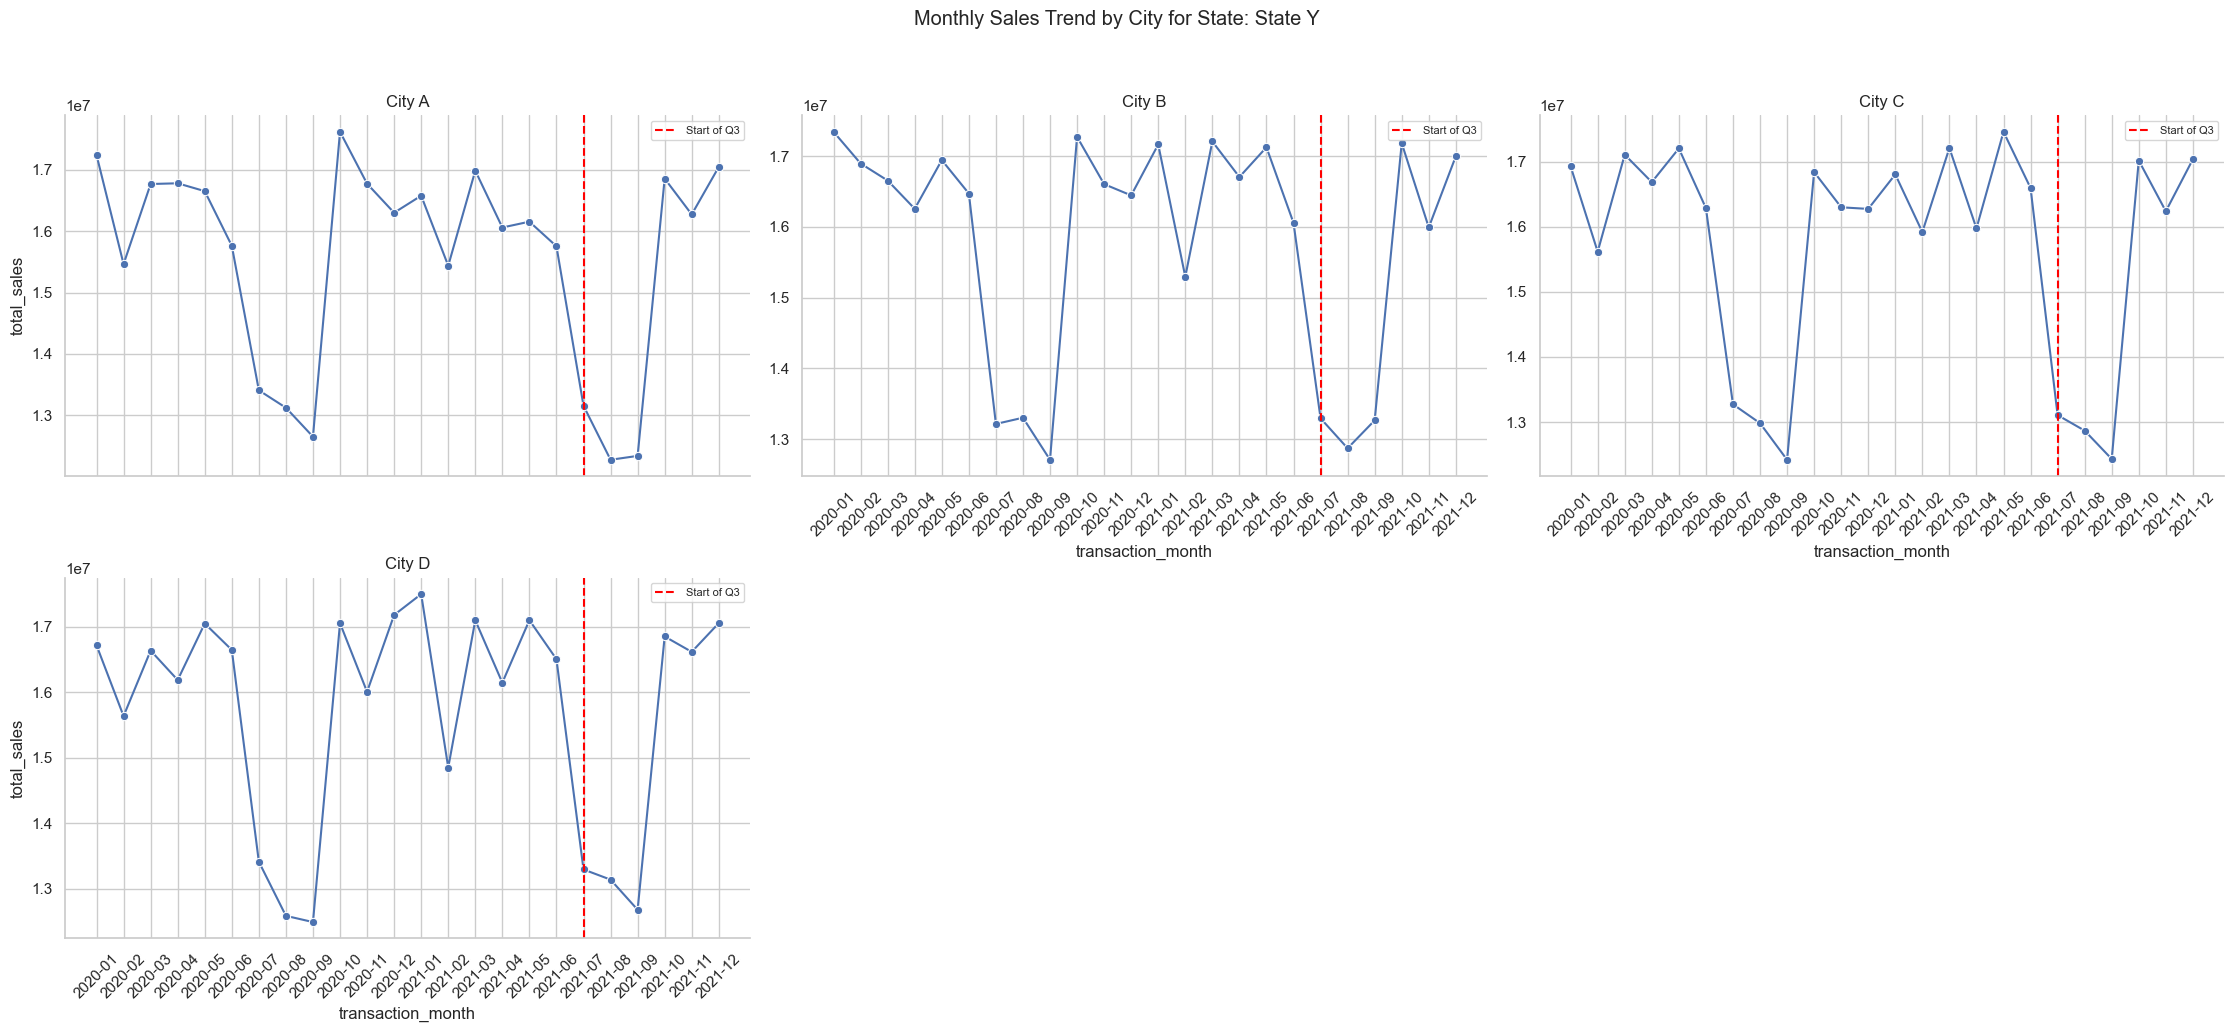

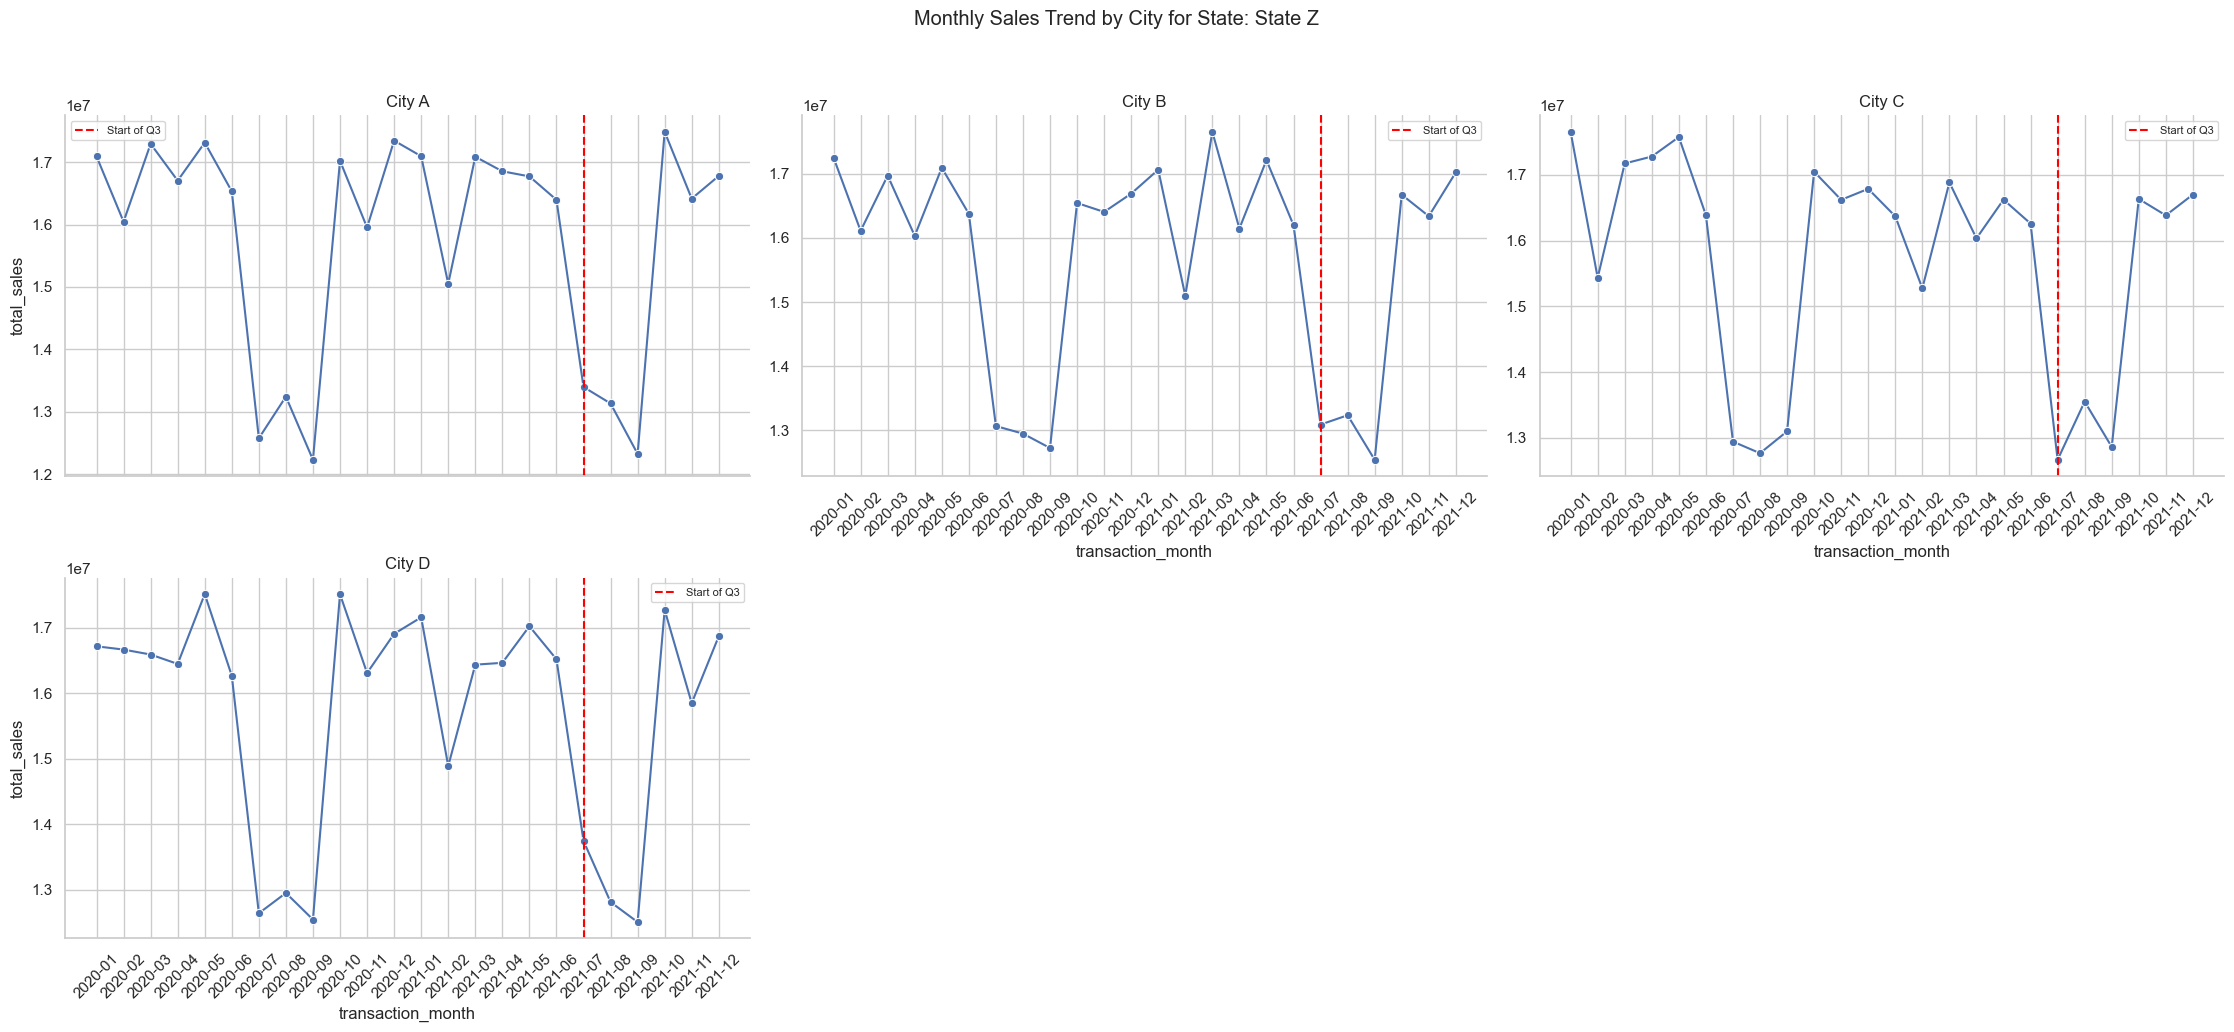

In [9]:
## Analysis by city
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

states = retail_data['store_state'].unique()
# Loop over each state to create a facet grid for its cities.
for state in states:
    # Filter the DataFrame for the current state.
    state_df = retail_data[retail_data['store_state'] == state].copy()
    
    # Aggregate total sales by city and month.
    city_monthly_sales = state_df.groupby(['store_city', 'transaction_month'])['total_sales'].sum().reset_index()
    city_monthly_sales = city_monthly_sales.sort_values(by=['store_city', 'transaction_month'])
    
    # Create a FacetGrid: each facet will represent one city in the state.
    g = sns.FacetGrid(city_monthly_sales, col="store_city",  col_wrap=3, height=5, aspect=1.5, sharey=False)
    g.map_dataframe(sns.lineplot, x="transaction_month", y="total_sales", marker="o")
    
    # Customize each subplot.
    for ax in g.axes.flatten():
        ax.tick_params(axis='x', rotation=45)
        # Mark the start of Q3 (adjust the x value as needed, e.g., "2021-07").
        ax.axvline(x='2021-07', color='red', linestyle='--', label='Start of Q3')
        ax.legend(fontsize=8)
    
    g.set_titles(col_template="{col_name}")
    plt.suptitle(f"Monthly Sales Trend by City for State: {state}", y=1.03)
    plt.tight_layout()
    plt.show()

plt.show()


### Quarterly plot by City

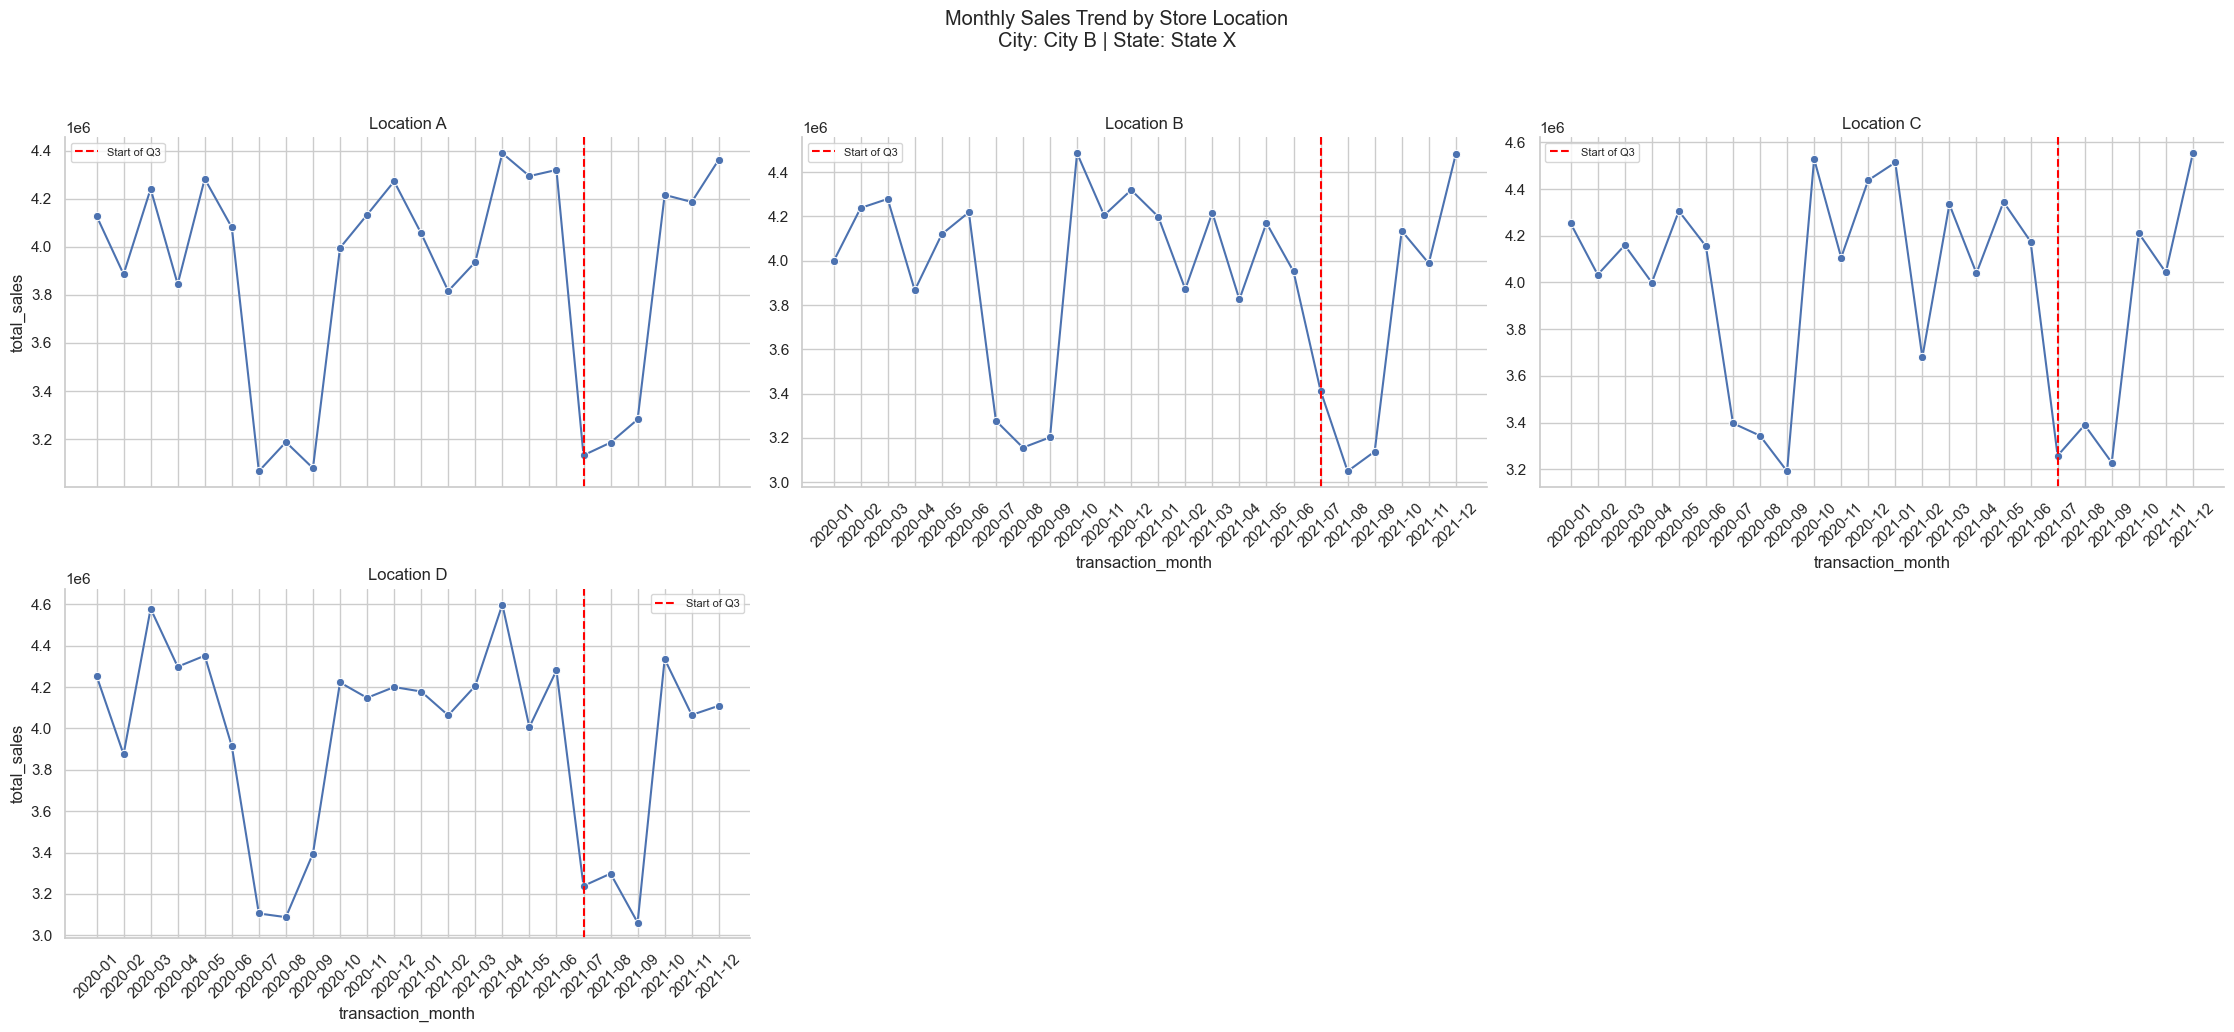

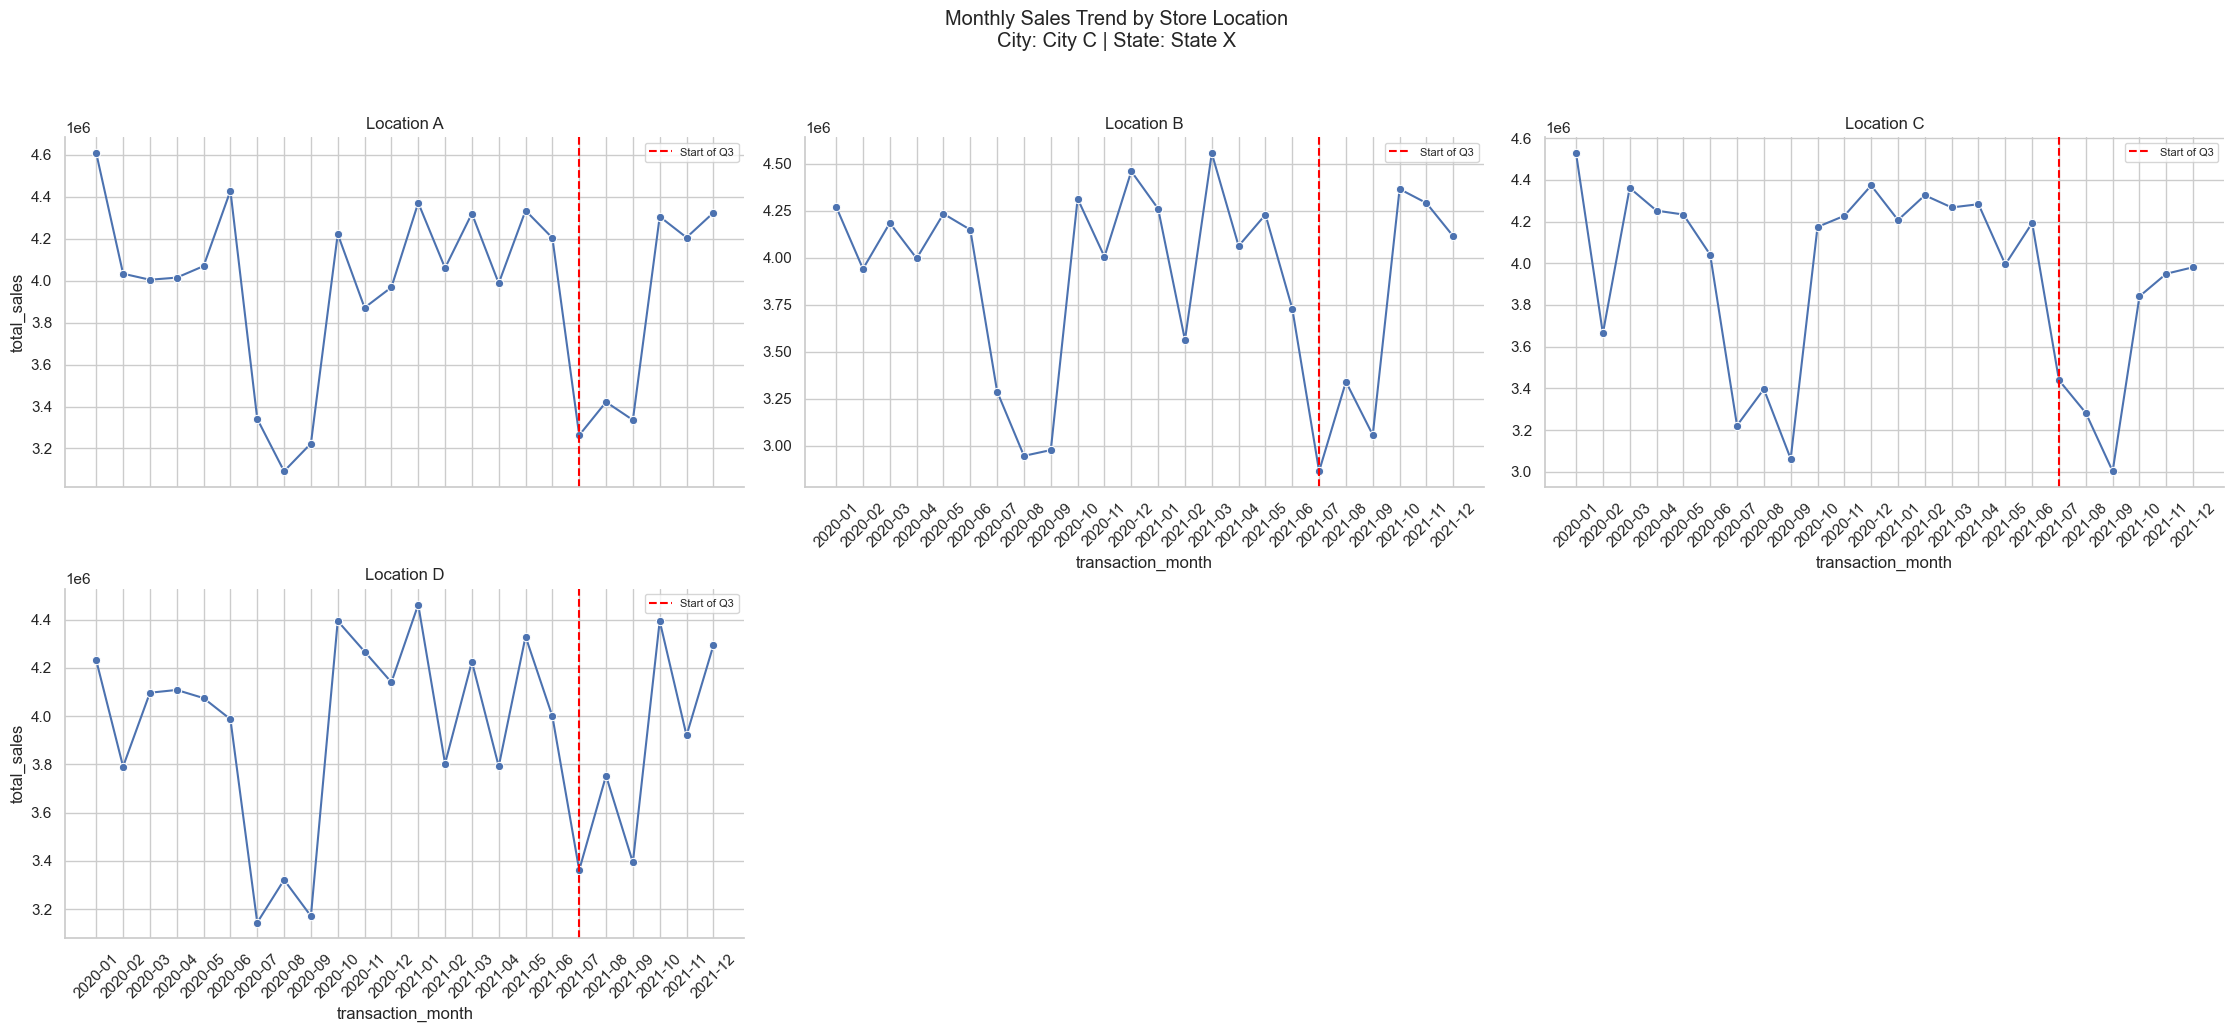

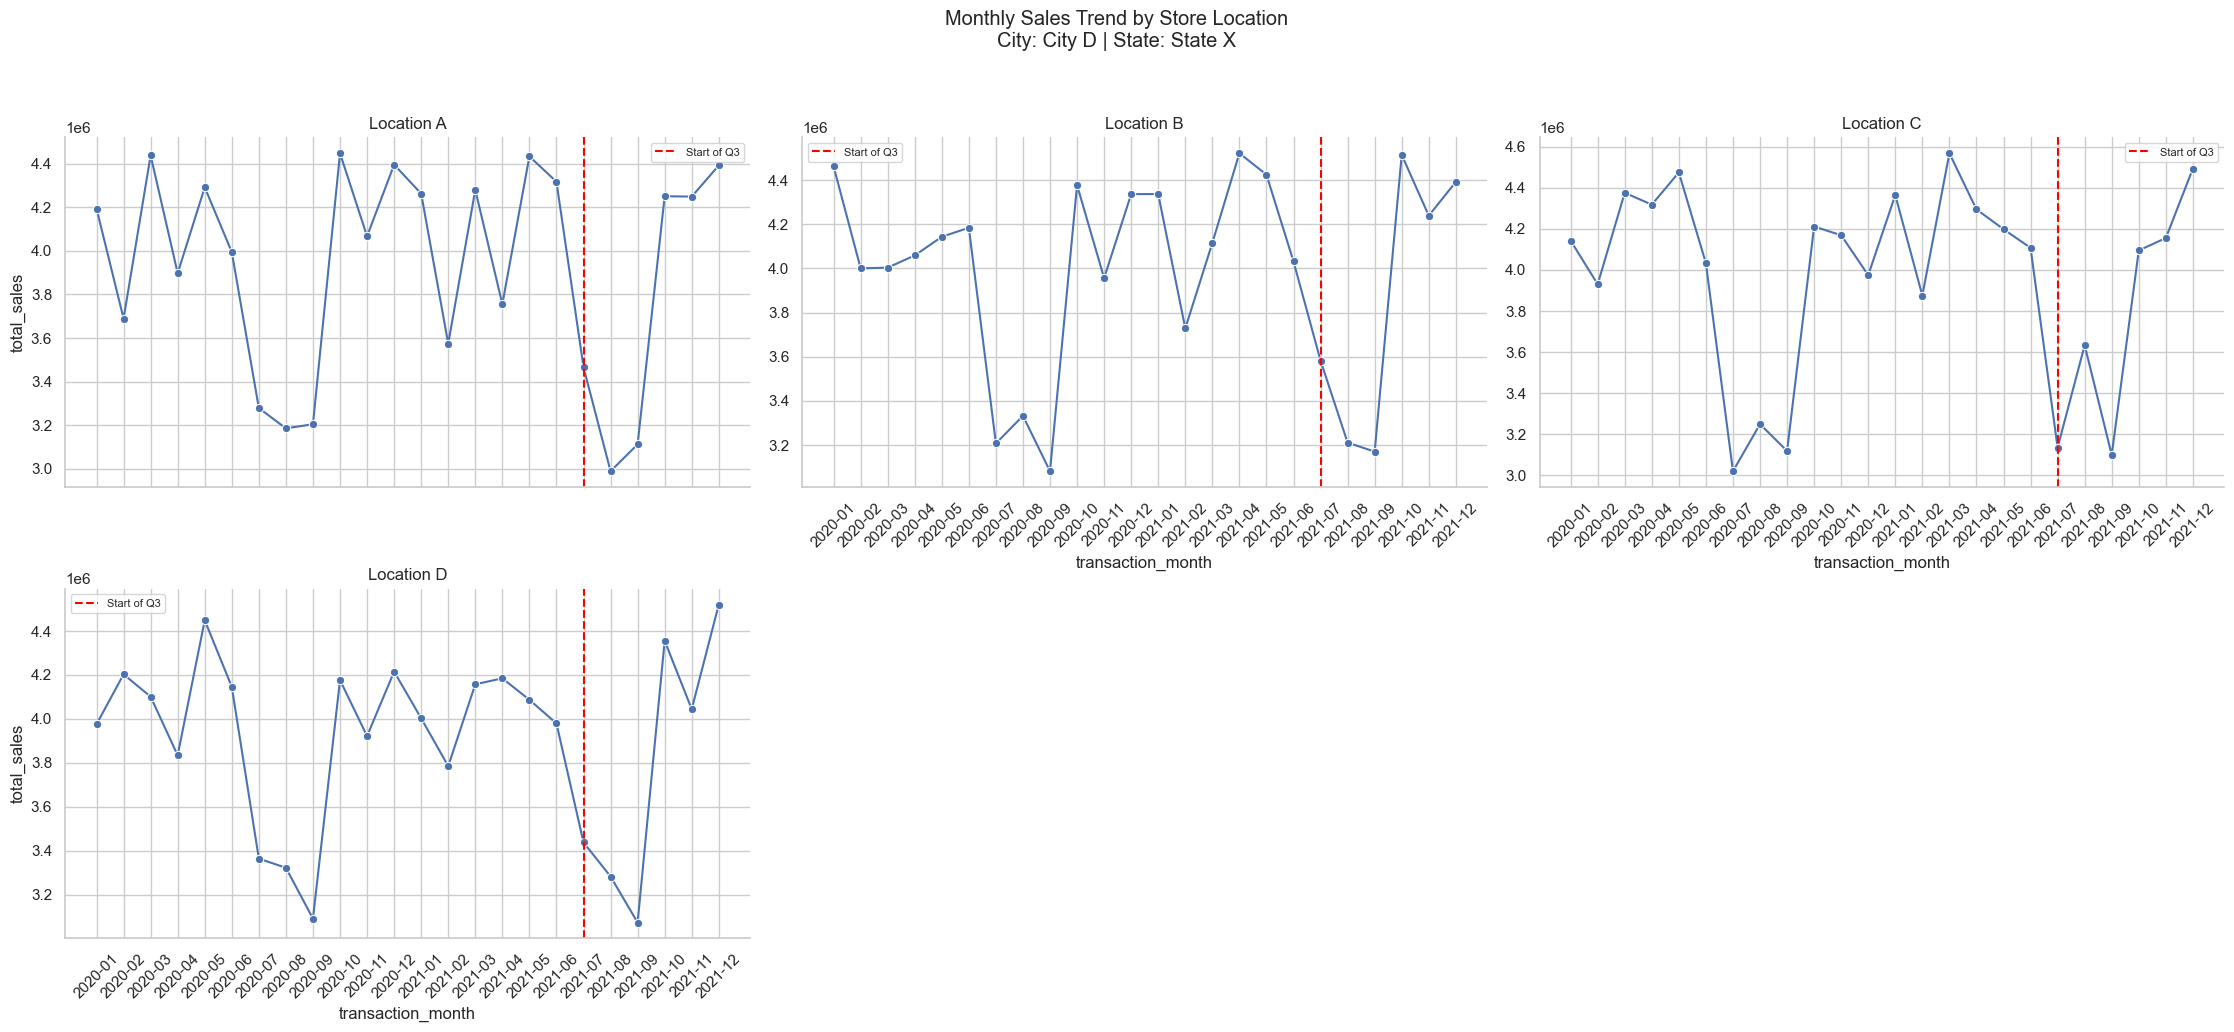

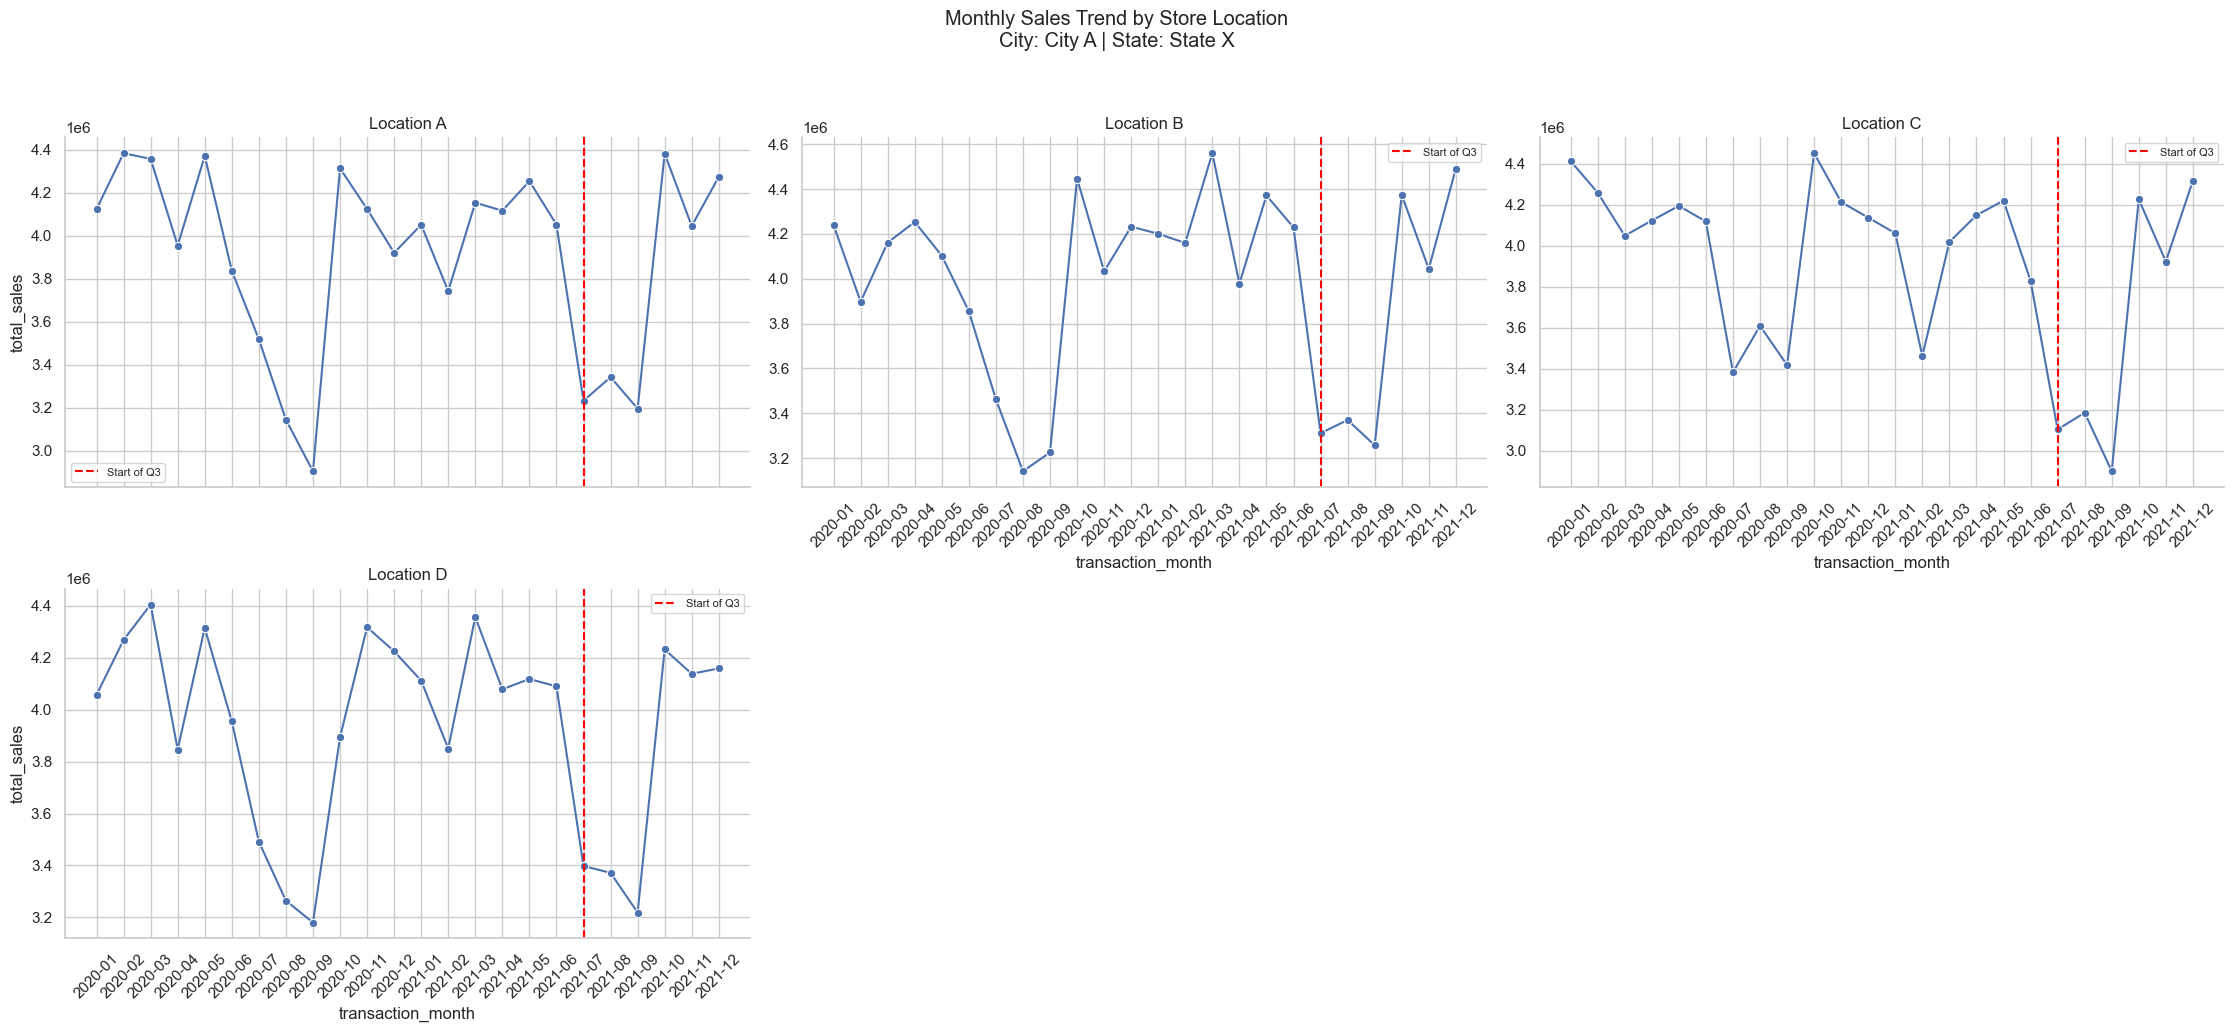

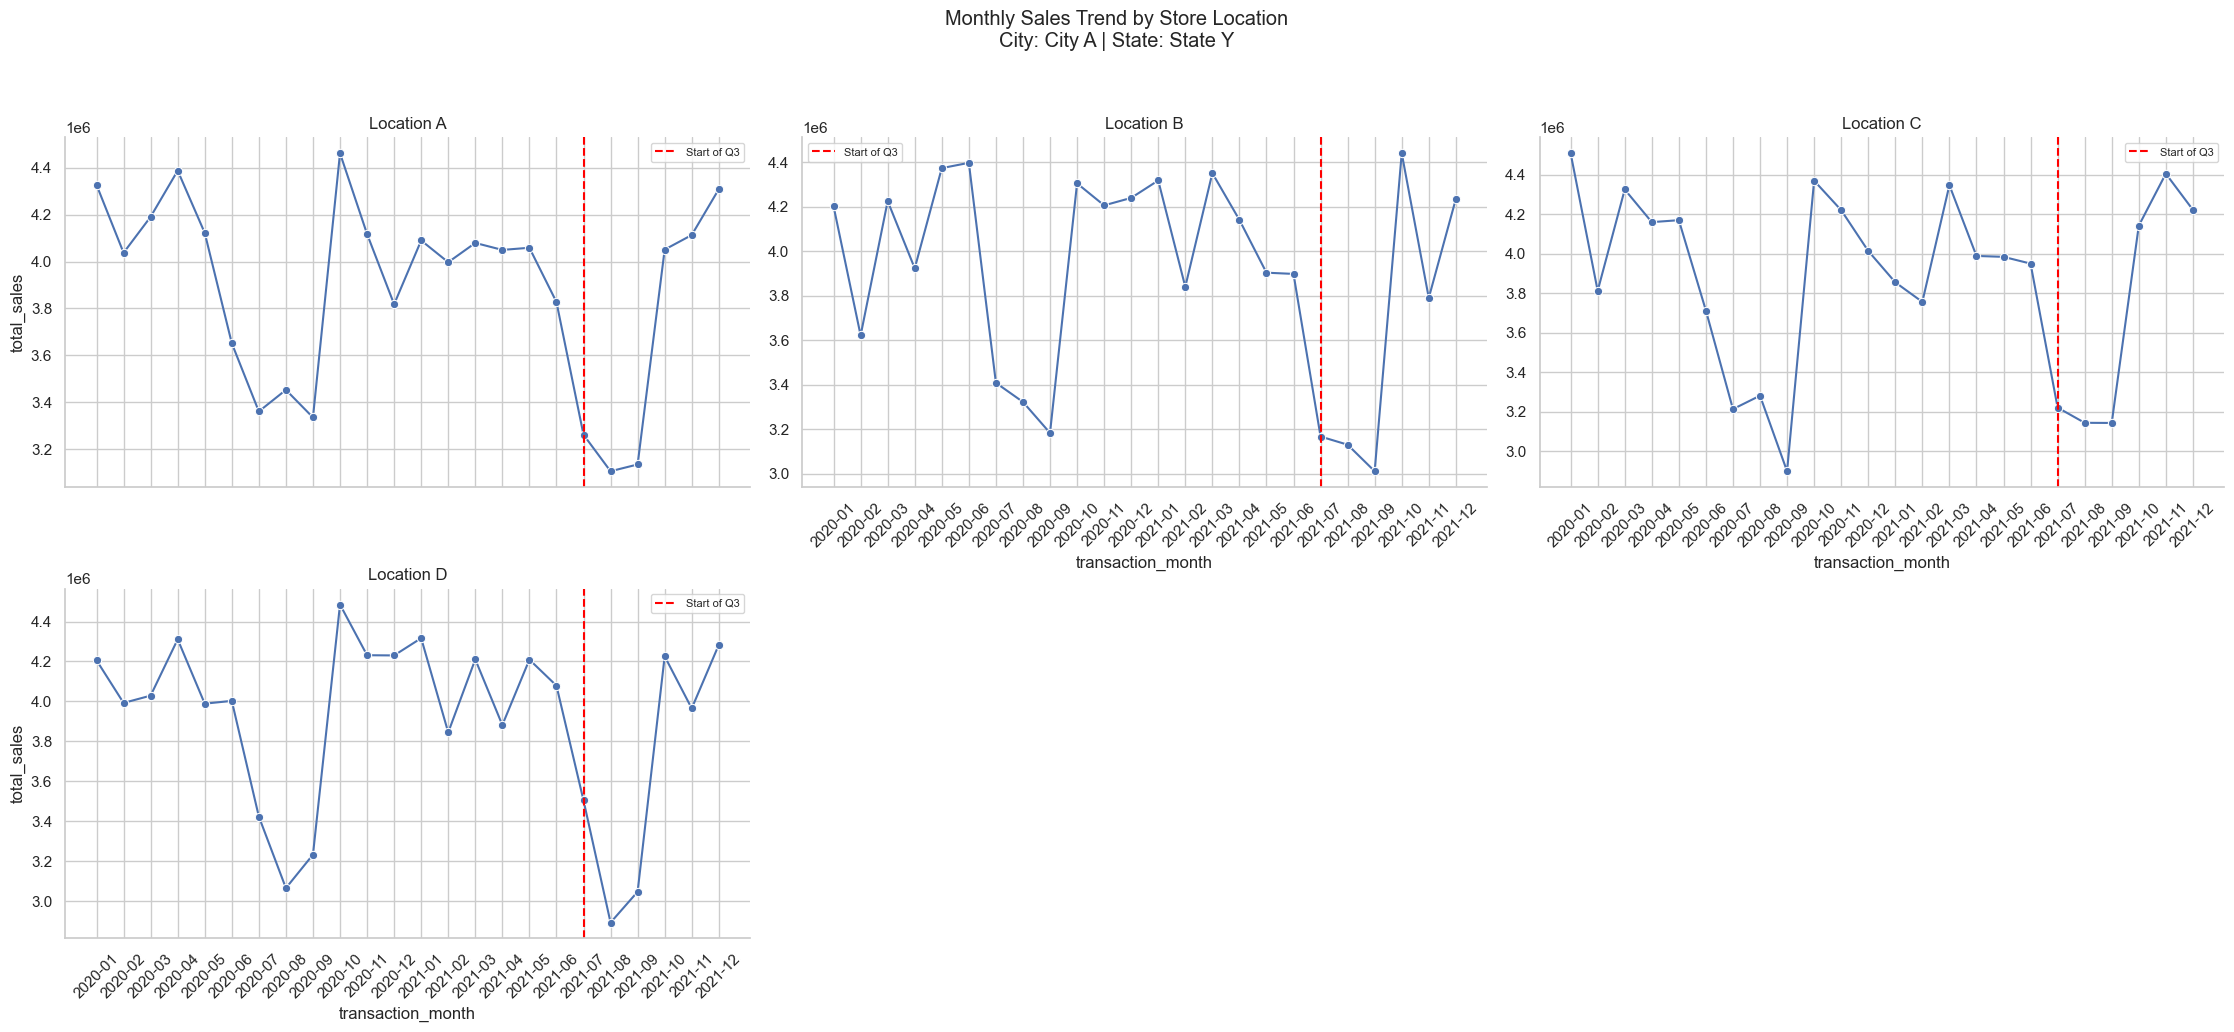

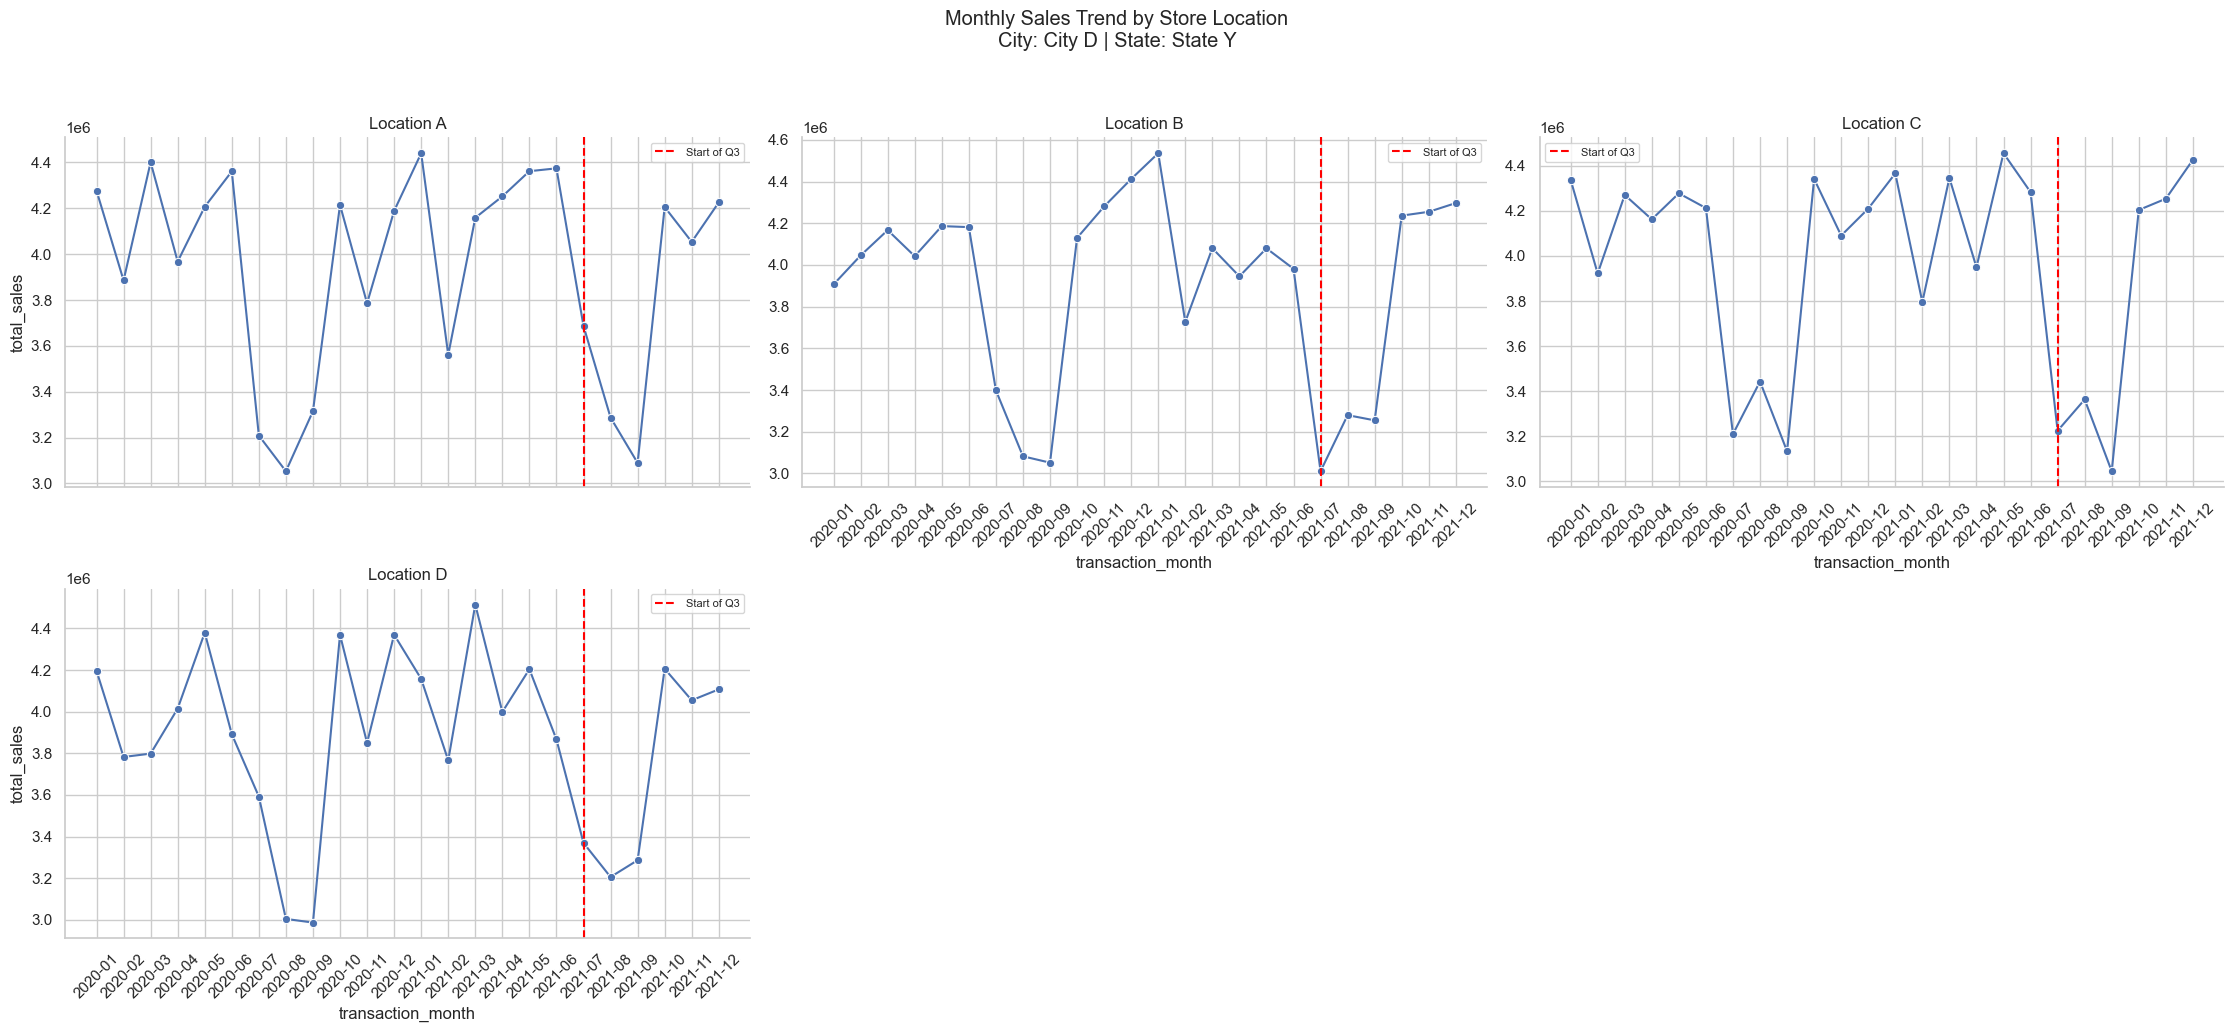

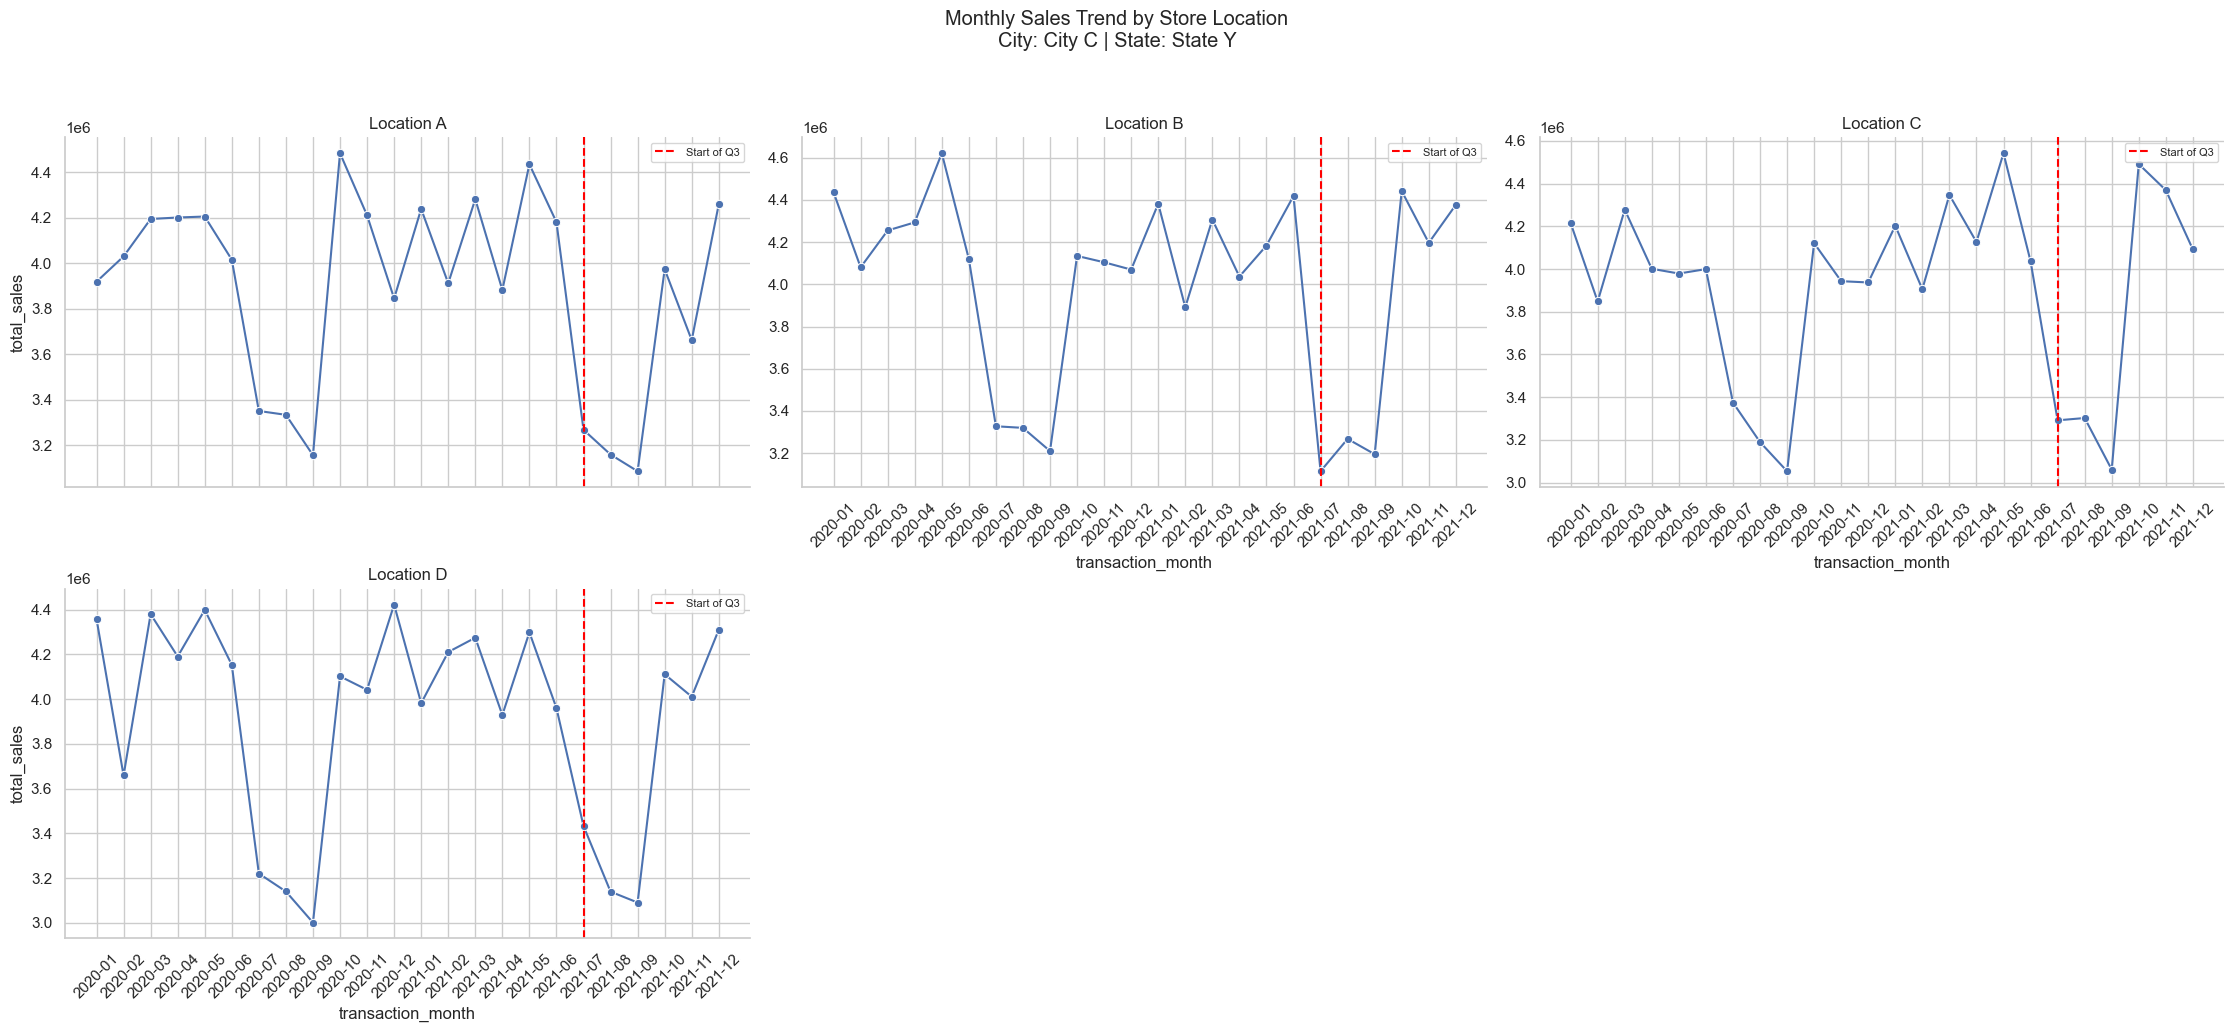

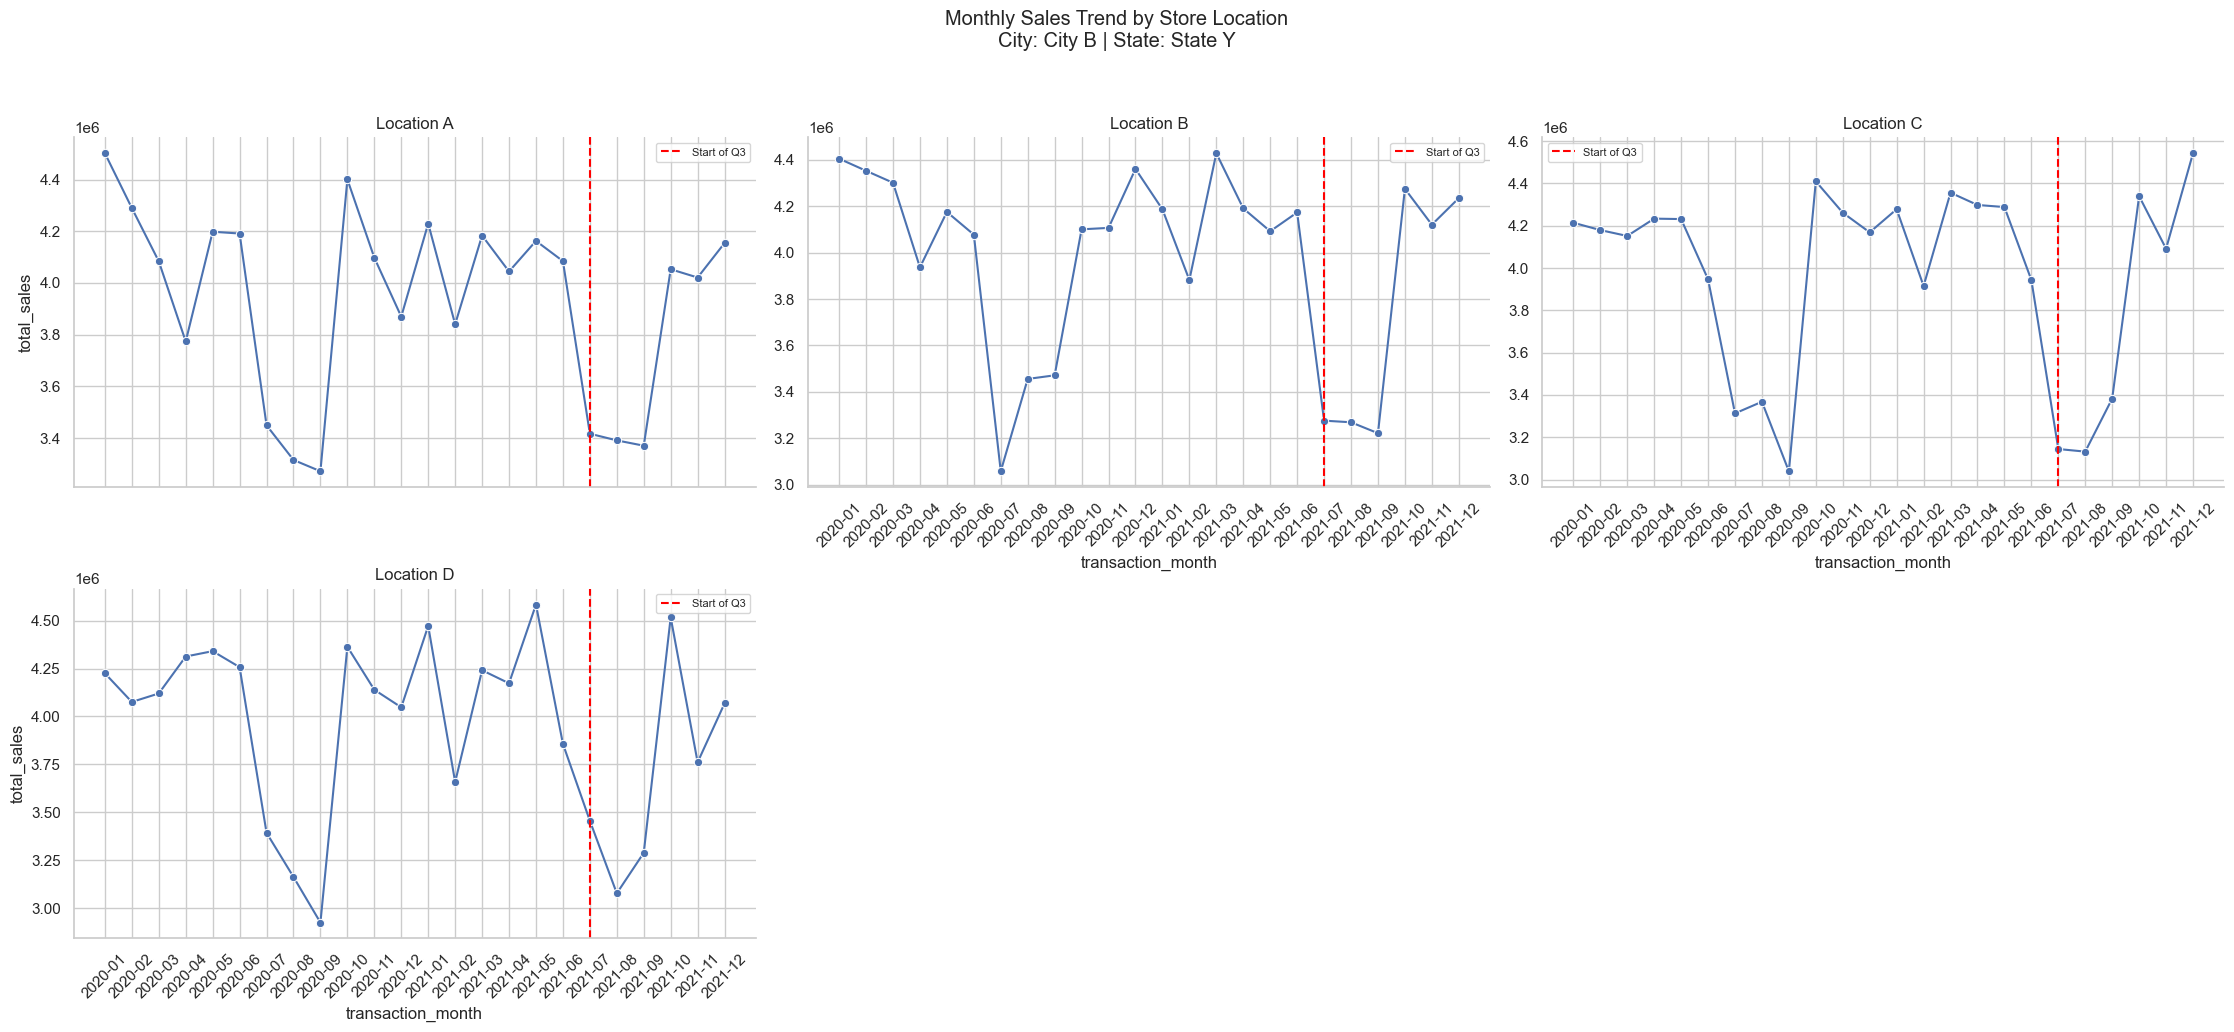

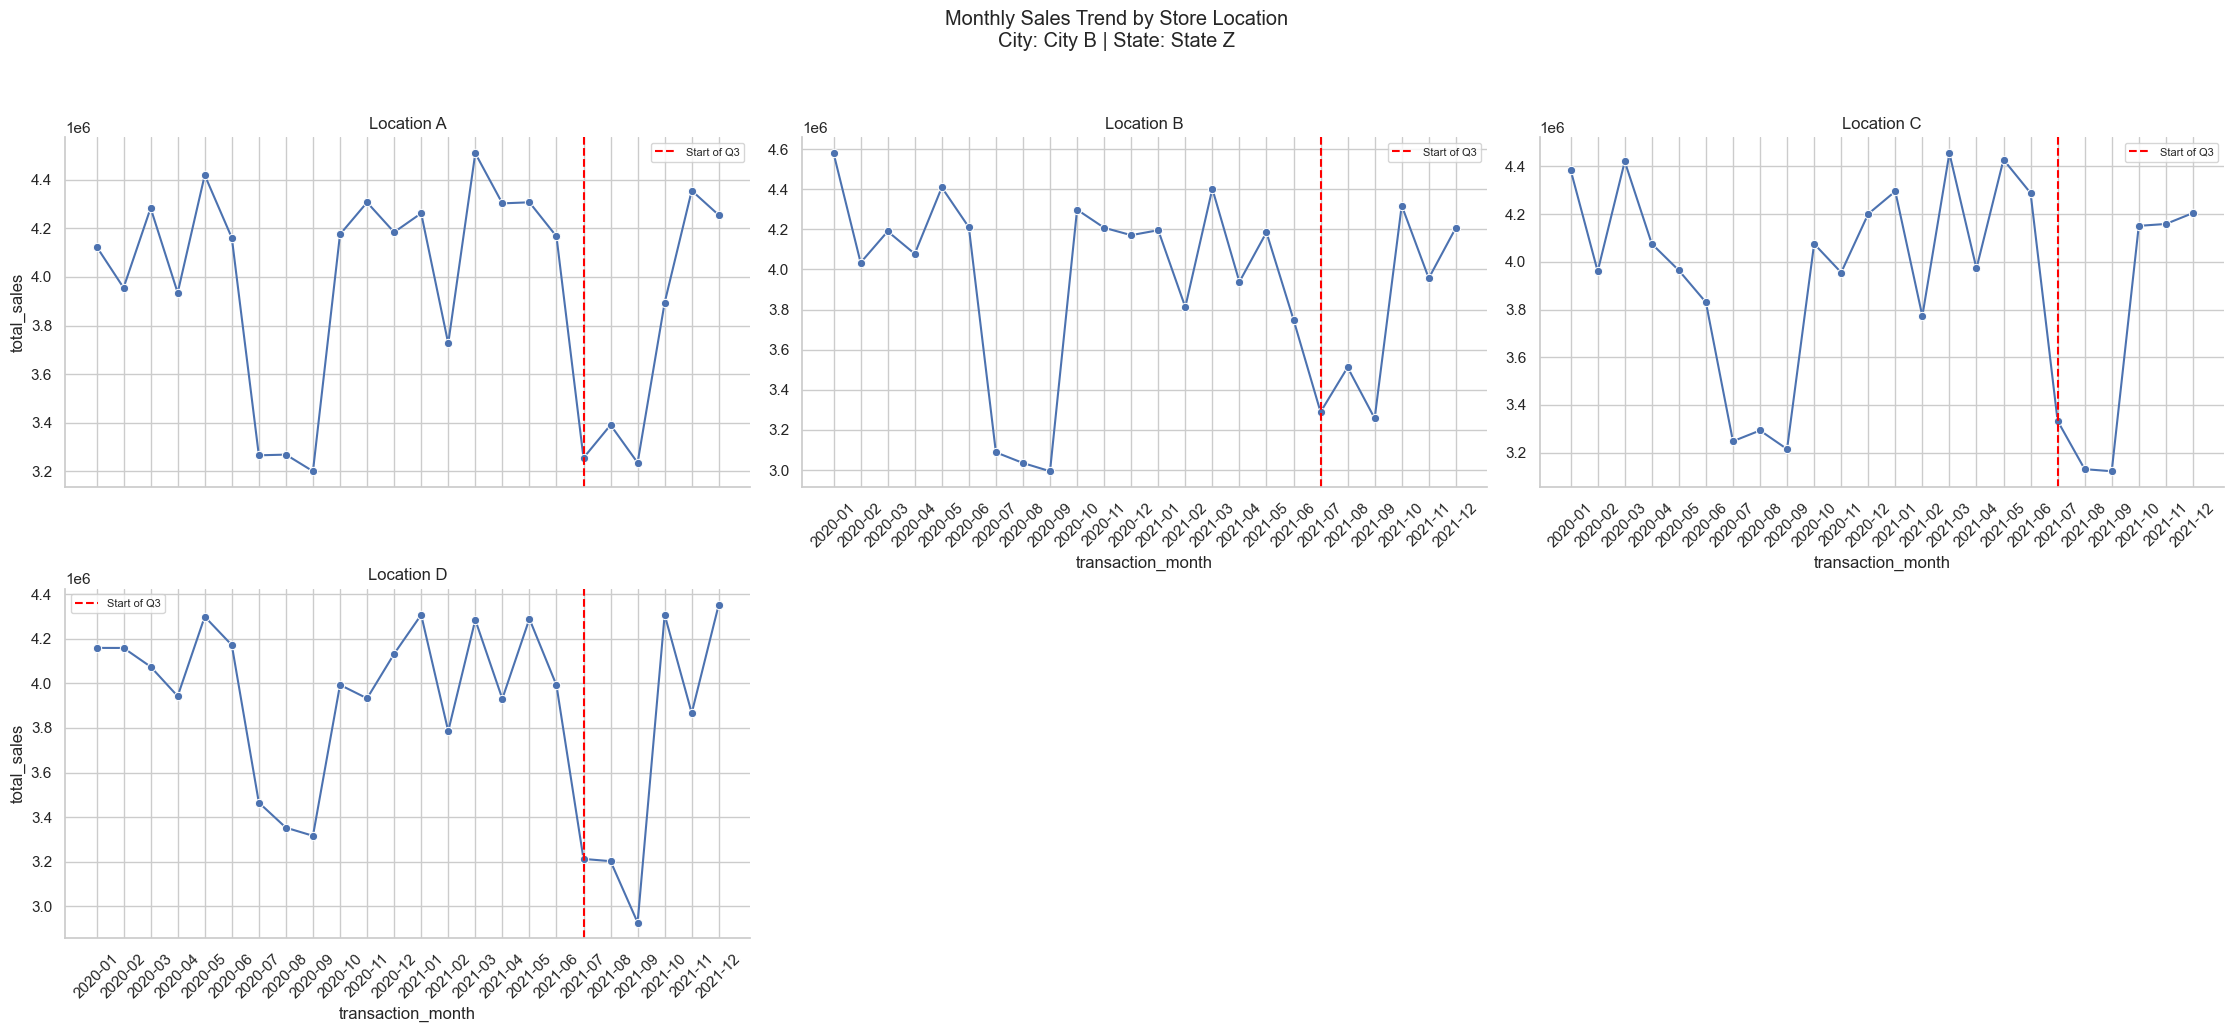

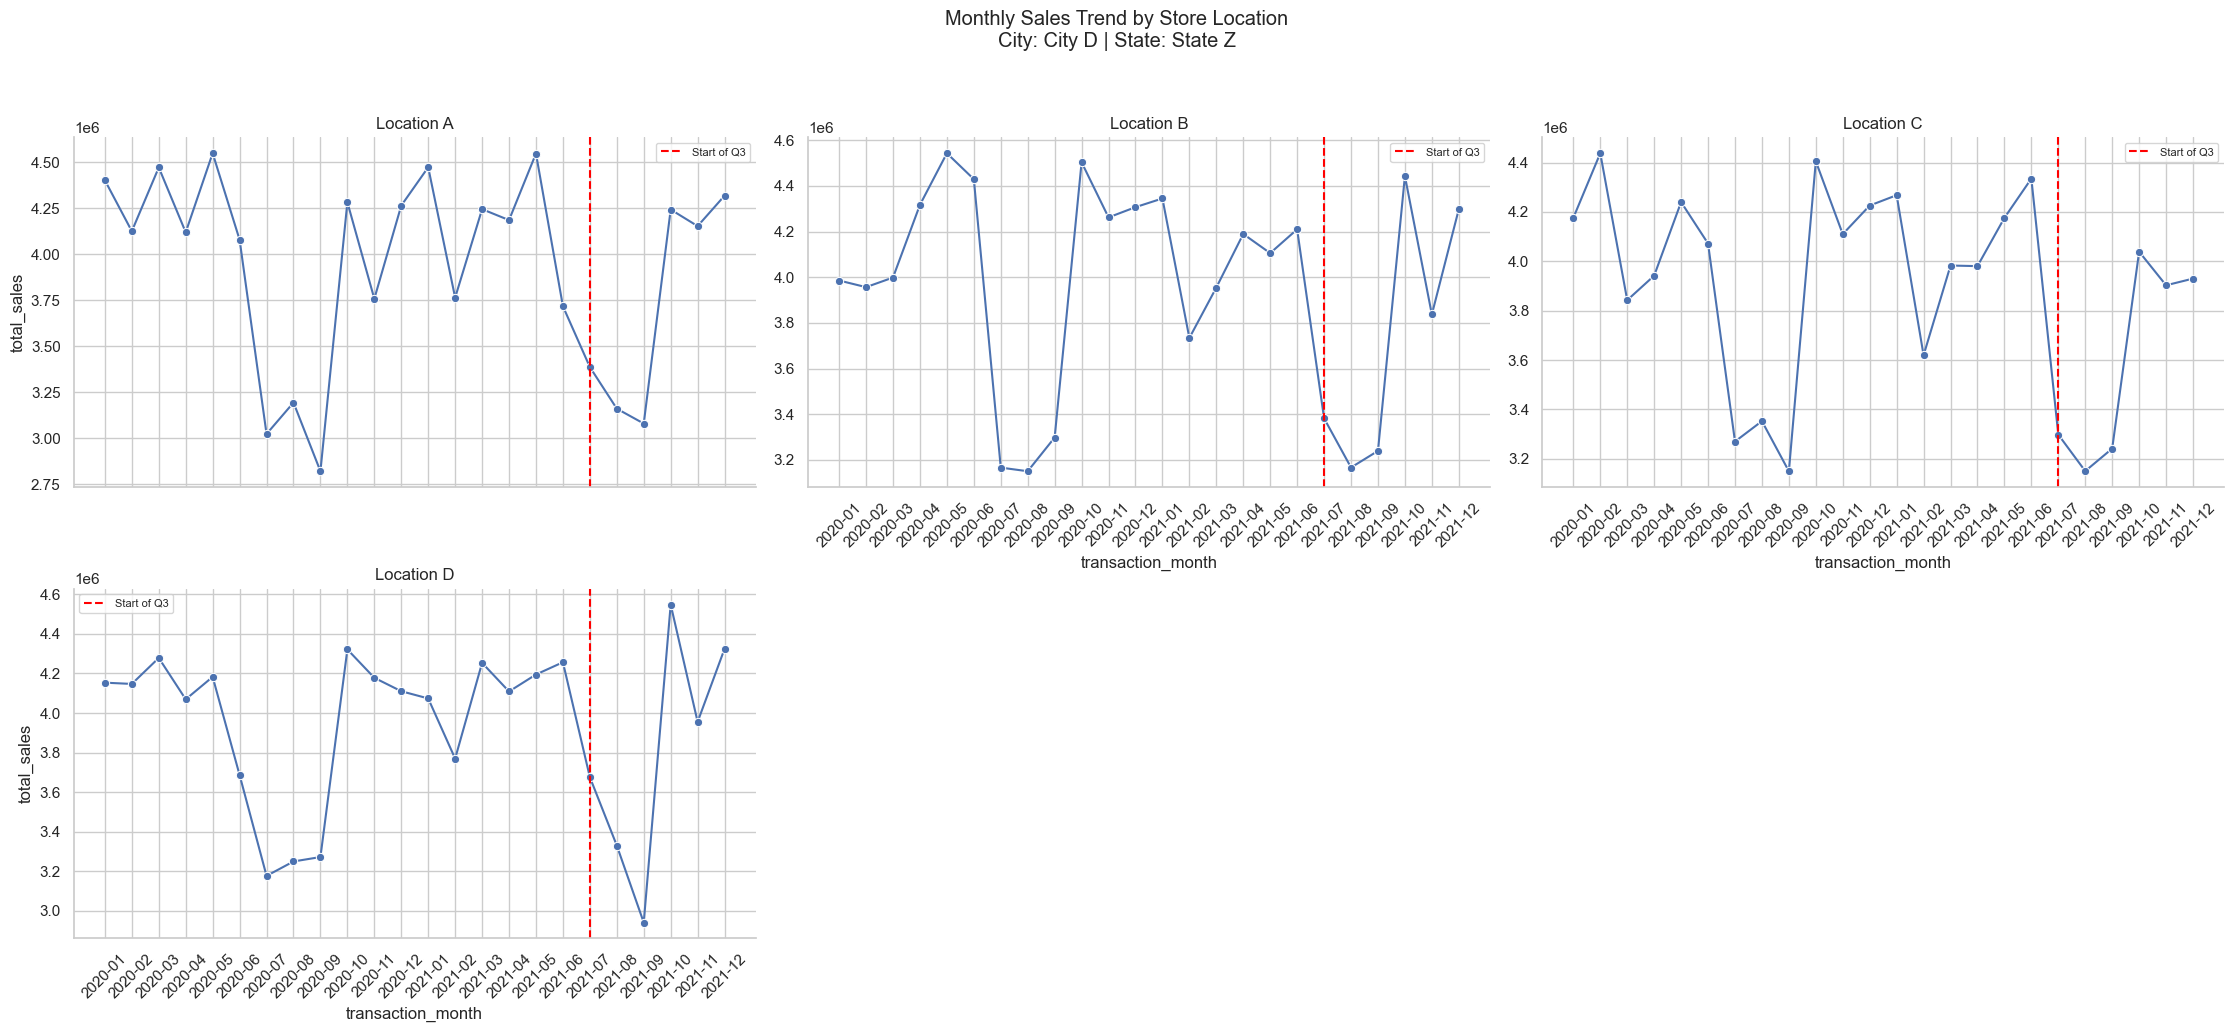

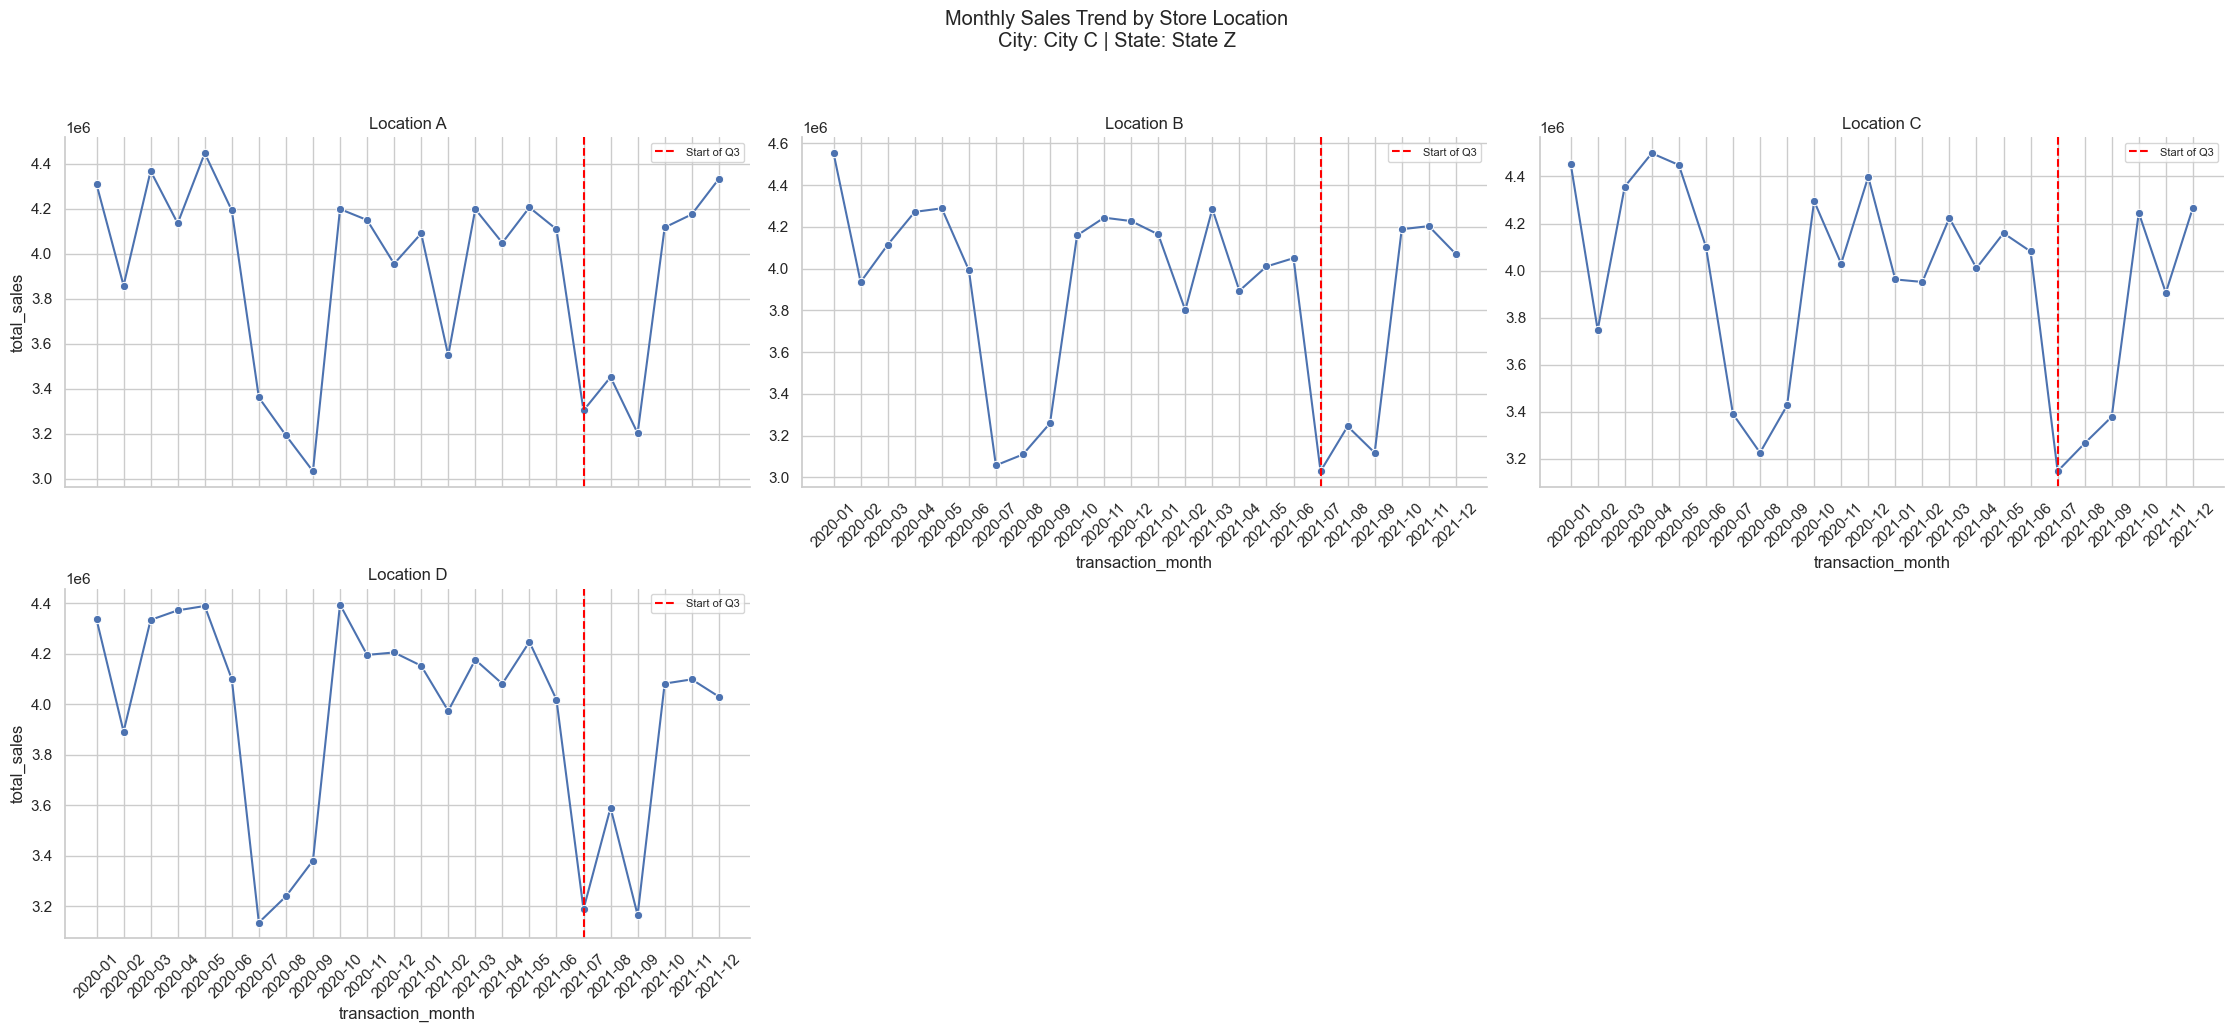

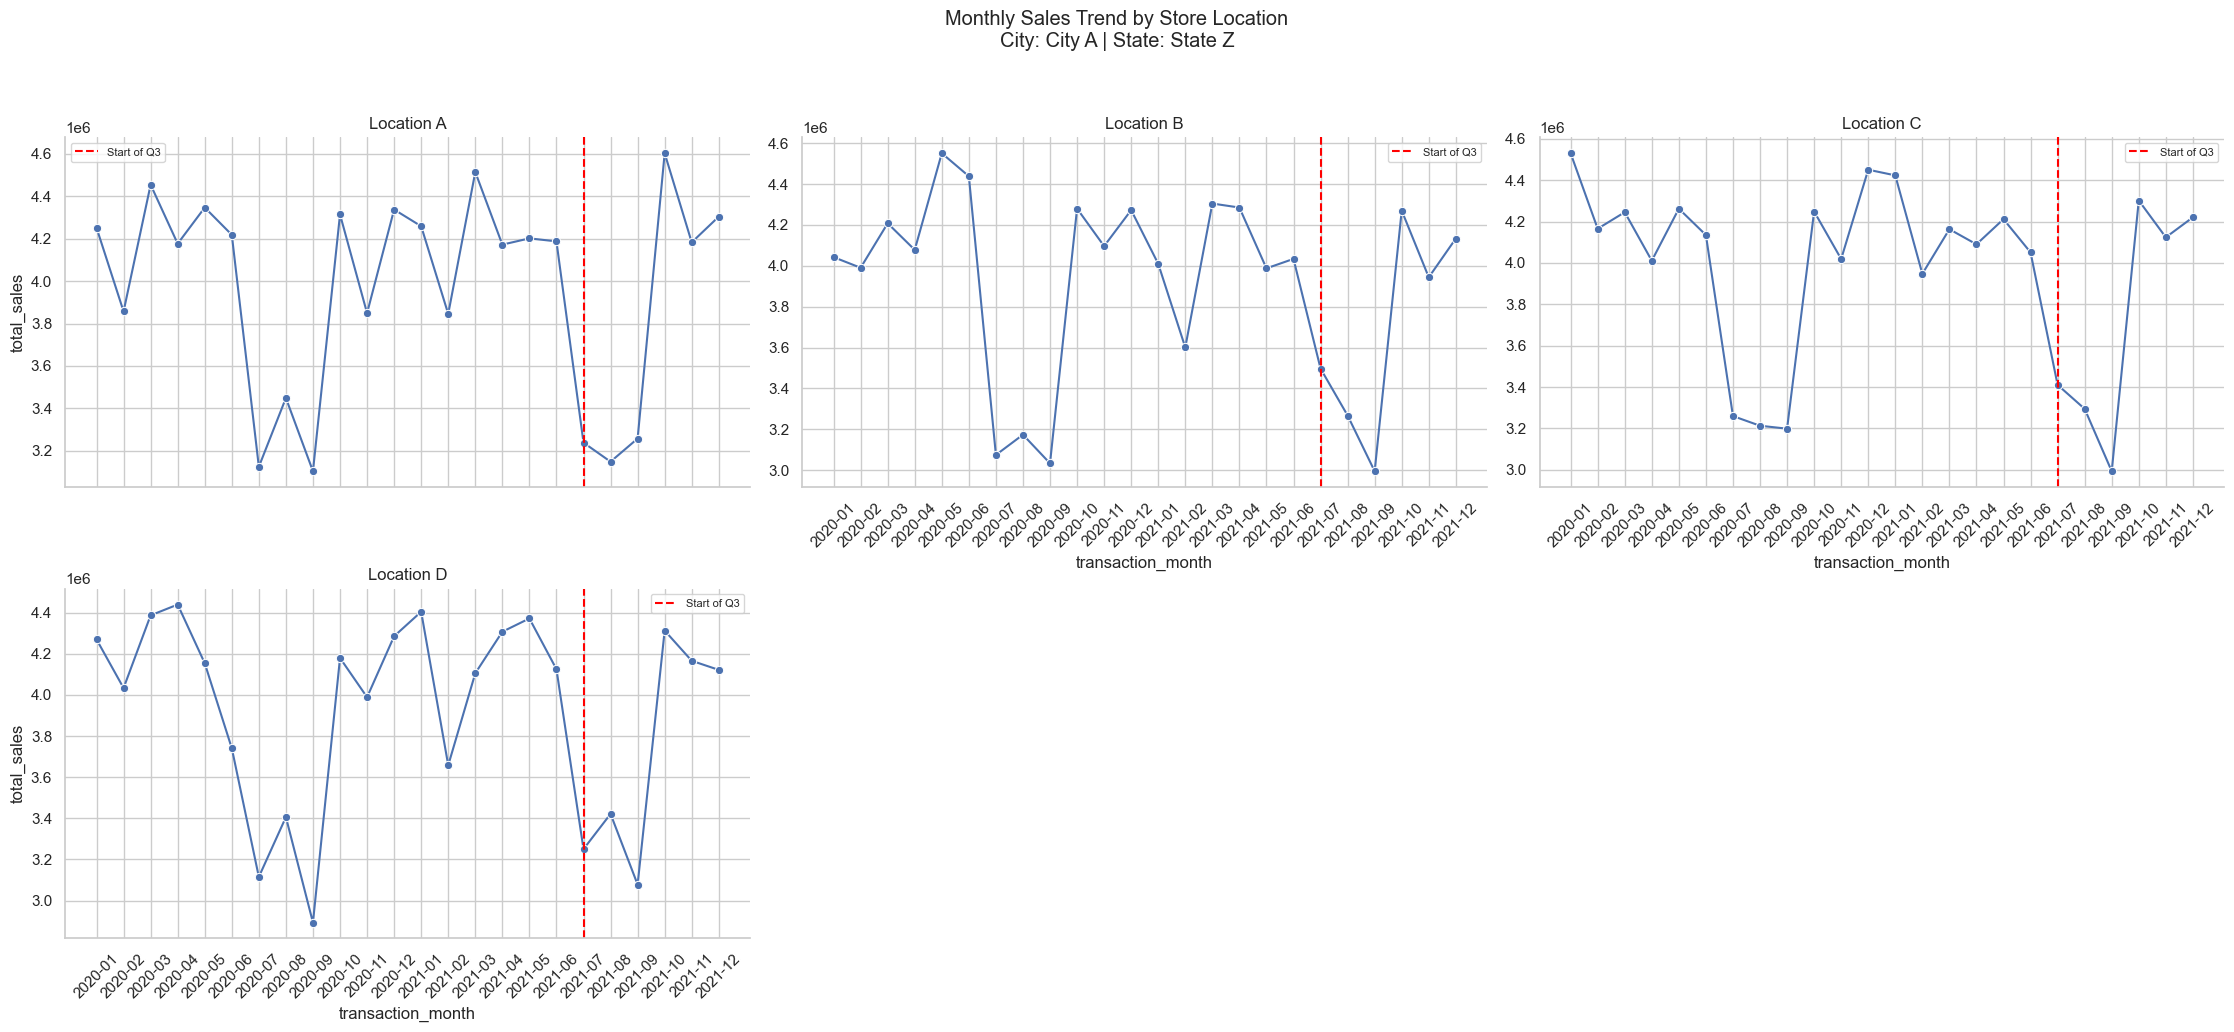

In [10]:
## Analysis for each city
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the unique states.
states = retail_data['store_state'].unique()

# Loop over each state.
for state in states:
    state_df = retail_data[retail_data['store_state'] == state].copy()
    # Get unique cities in the current state.
    cities = state_df['store_city'].unique()
    
    # Loop over each city in the current state.
    for city in cities:
        city_df = state_df[state_df['store_city'] == city].copy()
        
        # Aggregate monthly total sales by store_location.
        location_monthly_sales = city_df.groupby(['store_location', 'transaction_month'])['total_sales'].sum().reset_index()
        location_monthly_sales = location_monthly_sales.sort_values(by=['store_location', 'transaction_month'])
        
        # Create a FacetGrid: each facet represents one store_location in the current city.
        g = sns.FacetGrid(location_monthly_sales, col="store_location",  col_wrap=3, height=5, aspect=1.5, sharey=False)
        g.map_dataframe(sns.lineplot, x="transaction_month", y="total_sales", marker="o")
        
        # Customize each subplot.
        for ax in g.axes.flatten():
            ax.tick_params(axis='x', rotation=45)
            # Mark the start of Q3 (adjust the x value if necessary, e.g., "2021-07")
            ax.axvline(x='2021-07', color='red', linestyle='--', label='Start of Q3')
            ax.legend(fontsize=8)
        
        g.set_titles(col_template="{col_name}")
        plt.suptitle(f"Monthly Sales Trend by Store Location\nCity: {city} | State: {state}", y=1.03)
        plt.tight_layout()
        plt.show()


 ### Analysis by promotion_flag Column

Promotion Flag Sample:
        transaction_date promotion_start_date promotion_end_date  \
326587       2020-01-01           2021-06-15         2022-04-18   
766498       2020-01-01           2021-01-29         2022-06-18   
863140       2020-01-01           2021-10-24         2022-09-21   
850379       2020-01-01           2021-10-15         2022-12-28   
701637       2020-01-01           2021-05-31         2022-01-01   

        promotion_flag  
326587               0  
766498               0  
863140               0  
850379               0  
701637               0  
Sales by Quarter:
    quarter         mean    median           sum
0      1.0  5055.515376  5057.865  1.191150e+09
1      2.0  5055.357992  5057.650  1.193707e+09
2      3.0  5063.399037  5070.560  9.310021e+08
3      4.0  5048.172483  5050.760  1.208406e+09


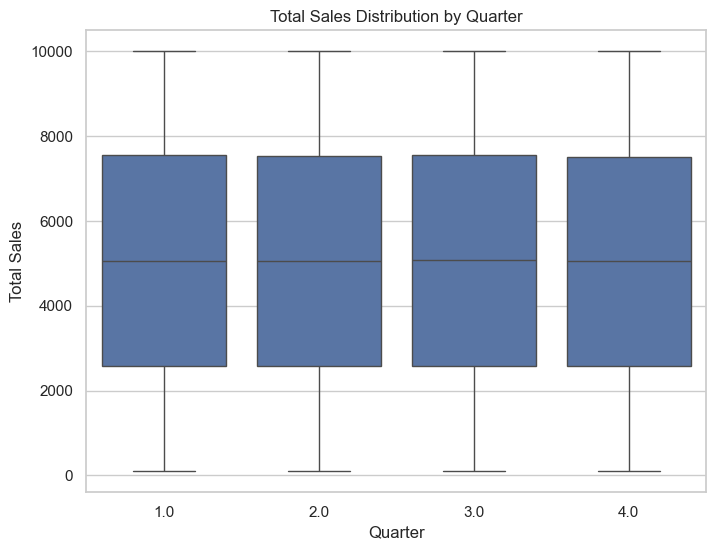

Promotion Frequency by Quarter:
    quarter  promotion_flag
0      1.0        0.062080
1      2.0        0.185773
2      3.0        0.312282
3      4.0        0.437293


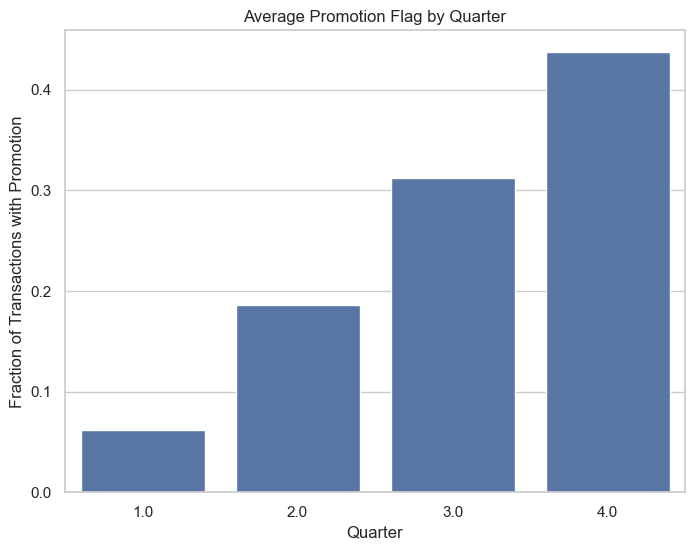

Average Transaction Value by Quarter:
    quarter  avg_transaction_value
0      1.0             255.047277
1      2.0             255.229130
2      3.0             255.169316
3      4.0             254.562120


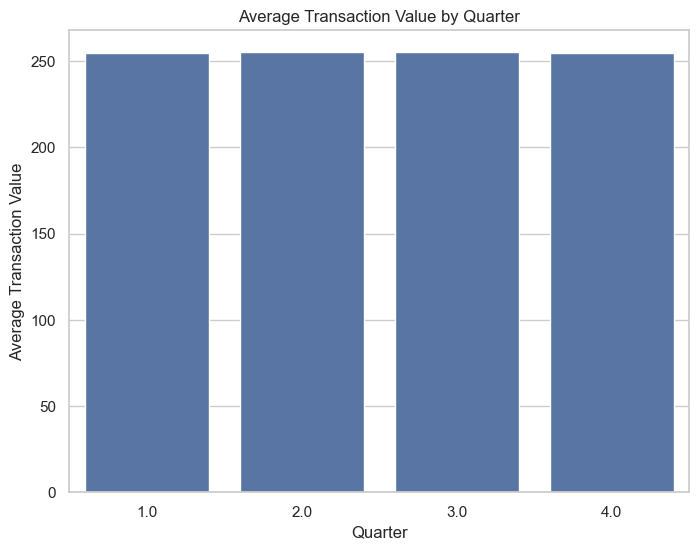

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
retail_data['promotion_start_date'] = pd.to_datetime(retail_data['promotion_start_date'], errors='coerce')
retail_data['promotion_end_date'] = pd.to_datetime(retail_data['promotion_end_date'], errors='coerce')
# ---------------------------
# Step 1: Create the promotion_flag Column
# ---------------------------
# This column will be 1 if the transaction_date is between promotion_start_date and promotion_end_date, otherwise 0.
retail_data['promotion_flag'] = retail_data.apply(
    lambda row: 1 if (
        pd.notnull(row['promotion_start_date']) and 
        pd.notnull(row['promotion_end_date']) and 
        pd.notnull(row['transaction_date']) and 
        (row['transaction_date'] >= row['promotion_start_date']) and 
        (row['transaction_date'] <= row['promotion_end_date'])
    ) else 0, axis=1
)

# Verify the new column
print("Promotion Flag Sample:\n", retail_data[['transaction_date', 'promotion_start_date', 'promotion_end_date', 'promotion_flag']].head())

# ---------------------------
# Step 2: Create a Quarter Column for Aggregation
# ---------------------------
# Assumes that 'transaction_date' is already a datetime (or date) object.
retail_data['quarter'] = retail_data['transaction_date'].apply(lambda x: x.quarter if pd.notnull(x) else None)

# ---------------------------
# Step 3: Quarterly Sales Analysis
# ---------------------------
# Aggregate total sales statistics by quarter.
sales_by_quarter = retail_data.groupby('quarter')['total_sales'].agg(['mean', 'median', 'sum']).reset_index()
print("Sales by Quarter:\n", sales_by_quarter)

# Plot the distribution of total_sales by quarter using a boxplot.
plt.figure(figsize=(8, 6))
sns.boxplot(x='quarter', y='total_sales', data=retail_data)
plt.title('Total Sales Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

# ---------------------------
# Step 4: Promotion Activity Analysis by Quarter
# ---------------------------
# Calculate the average promotion_flag for each quarter
# (This gives the fraction of transactions that occurred during a promotion.)
promotion_frequency = retail_data.groupby('quarter')['promotion_flag'].mean().reset_index()
print("Promotion Frequency by Quarter:\n", promotion_frequency)

plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='promotion_flag', data=promotion_frequency)
plt.title('Average Promotion Flag by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Fraction of Transactions with Promotion')
plt.show()

# ---------------------------
# Step 5: Average Transaction Value Analysis by Quarter
# ---------------------------
avg_trans_by_quarter = retail_data.groupby('quarter')['avg_transaction_value'].mean().reset_index()
print("Average Transaction Value by Quarter:\n", avg_trans_by_quarter)

plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='avg_transaction_value', data=avg_trans_by_quarter)
plt.title('Average Transaction Value by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Transaction Value')
plt.show()


In [12]:
# import pandas as pd

# # Filter the DataFrame for Q1 and Q2 only (assuming the quarter column has already been created)
# df_q1_q2 = retail_data[retail_data['quarter'].isin([1, 2])].copy()

# # Group by quarter and promotion_flag, counting unique customer_id values.
# customer_counts = df_q1_q2.groupby(['quarter', 'promotion_flag'])['customer_id'].nunique().reset_index()

# # Rename the column for clarity
# customer_counts.rename(columns={'customer_id': 'unique_customers'}, inplace=True)

# print("Unique Customer Counts by Quarter and Promotion Flag (1 = In Promotion, 0 = Out of Promotion):")
# print(customer_counts)


### Customer analysis by promotion availed

In [13]:
import pandas as pd

# Ensure transaction_date is in datetime format (if not already done)
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'], errors='coerce')

# Create a year column from transaction_date
retail_data['year'] = retail_data['transaction_date'].dt.year

# Group by year, quarter, and promotion_flag and count unique customer_id values.
customer_counts = (
    retail_data.groupby(['year', 'quarter', 'promotion_flag'])['customer_id']
      .nunique()
      .reset_index()
      .rename(columns={'customer_id': 'unique_customers'})
      .sort_values(by=['year', 'quarter'])
)

print("Unique Customer Counts by Year, Quarter, and Promotion Flag (1 = In Promotion, 0 = Out of Promotion):")
print(customer_counts)


Unique Customer Counts by Year, Quarter, and Promotion Flag (1 = In Promotion, 0 = Out of Promotion):
      year  quarter  promotion_flag  unique_customers
0   2020.0      1.0               0            118566
1   2020.0      2.0               0            118259
2   2020.0      3.0               0             91725
3   2020.0      4.0               0            119724
4   2021.0      1.0               0            102421
5   2021.0      1.0               1             14627
6   2021.0      2.0               0             74002
7   2021.0      2.0               1             43866
8   2021.0      3.0               0             34725
9   2021.0      3.0               1             57419
10  2021.0      4.0               0             14974
11  2021.0      4.0               1            104677


### Sales by Quarter and Income Bracket for 2021

In [14]:
# sales_by_quarter = retail_data.groupby('quarter')['total_sales'].agg(['mean', 'median', 'sum']).reset_index()
# print("Sales by Quarter:\n", sales_by_quarter)

# # Plot the distribution of total_sales by quarter using a boxplot.
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='quarter', y='total_sales', data=retail_data)
# plt.title('Total Sales Distribution by Quarter')
# plt.xlabel('Quarter')
# plt.ylabel('Total Sales')
# plt.show()
import pandas as pd

# Filter the DataFrame for the year 2021.
df_2020 = retail_data[retail_data['year'] == 2020]

# Group by quarter and income_bracket, then sum the total_sales.
income_sales = df_2020.groupby(['quarter', 'income_bracket'])['total_sales'].sum().reset_index()

# Optionally, sort the results for readability.
income_sales = income_sales.sort_values(by=['quarter', 'income_bracket'])

print("Total Sales by Quarter and Income Bracket for 2020:")
print(income_sales)


Total Sales by Quarter and Income Bracket for 2020:
    quarter income_bracket   total_sales
0       1.0           high  1.983881e+08
1       1.0            low  2.011982e+08
2       1.0         medium  2.001874e+08
3       2.0           high  1.997560e+08
4       2.0            low  1.996220e+08
5       2.0         medium  1.988410e+08
6       3.0           high  1.547137e+08
7       3.0            low  1.553113e+08
8       3.0         medium  1.541381e+08
9       4.0           high  2.020453e+08
10      4.0            low  1.998153e+08
11      4.0         medium  2.019774e+08


In [15]:
import pandas as pd

# Filter the DataFrame for the year 2021.
df_2021 = retail_data[retail_data['year'] == 2021]

# Group by quarter and income_bracket, then sum the total_sales.
income_sales = df_2021.groupby(['quarter', 'income_bracket'])['total_sales'].sum().reset_index()

# Optionally, sort the results for readability.
income_sales1 = income_sales.sort_values(by=['quarter', 'income_bracket'])

print("Total Sales by Quarter and Income Bracket for 2021:")
print(income_sales1)


Total Sales by Quarter and Income Bracket for 2021:
    quarter income_bracket   total_sales
0       1.0           high  1.964804e+08
1       1.0            low  1.980988e+08
2       1.0         medium  1.967973e+08
3       2.0           high  2.010634e+08
4       2.0            low  1.977600e+08
5       2.0         medium  1.966641e+08
6       3.0           high  1.550310e+08
7       3.0            low  1.541717e+08
8       3.0         medium  1.576363e+08
9       4.0           high  2.020347e+08
10      4.0            low  2.019301e+08
11      4.0         medium  2.006035e+08


In [16]:
import pandas as pd

# Filter the DataFrame for the year 2021
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# Group by quarter and income_bracket, aggregating total_sales (summed) and unique customer count.
income_bracket_summary = df_2021.groupby(['quarter', 'income_bracket']).agg(
    total_sales=('total_sales', 'sum'),
    customer_count=('customer_id', 'nunique')
).reset_index()

print("Income Bracket Sales and Customer Count by Quarter for 2021:")
print(income_bracket_summary)


Income Bracket Sales and Customer Count by Quarter for 2021:
    quarter income_bracket   total_sales  customer_count
0       1.0           high  1.964804e+08           38968
1       1.0            low  1.980988e+08           39082
2       1.0         medium  1.967973e+08           38998
3       2.0           high  2.010634e+08           39690
4       2.0            low  1.977600e+08           39147
5       2.0         medium  1.966641e+08           39031
6       3.0           high  1.550310e+08           30671
7       3.0            low  1.541717e+08           30419
8       3.0         medium  1.576363e+08           31054
9       4.0           high  2.020347e+08           39976
10      4.0            low  2.019301e+08           40069
11      4.0         medium  2.006035e+08           39606


In [17]:
import pandas as pd

# ---------------------------------
# Step 1: Filter for 2021 Data
# ---------------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------------
# Step 2: Group by Quarter, Income Bracket, and Promotion Target Audience
# ---------------------------------
# This groups by quarter, income_bracket, and promotion_target_audience
# Then, for each group, it sums total_sales and counts unique customer_id values.
customer_summary = df_2021.groupby(
    ['quarter', 'income_bracket', 'promotion_target_audience']
).agg(
    total_sales=('total_sales', 'sum'),
    customer_count=('customer_id', 'nunique')
).reset_index()

print("Customer Summary by Quarter, Income Bracket, and Promotion Target Audience:")
print(customer_summary)

# ---------------------------------
# Step 3: (Optional) Pivot the Table for New vs. Returning Customer Counts
# ---------------------------------
# This pivot table rearranges the data so that for each quarter and income bracket
# you have separate columns for new and returning customer counts.
pivot_counts = customer_summary.pivot_table(
    index=['quarter', 'income_bracket'],
    columns='promotion_target_audience',
    values='customer_count',
    fill_value=0  # Replace missing values with 0
).reset_index()

# Optionally, rename the pivot table columns for clarity.
pivot_counts.columns.name = None  # Remove the pivot table's index name
print("\nPivot Table: Unique Customer Counts by Quarter, Income Bracket (New vs. Returning):")
print(pivot_counts)


Customer Summary by Quarter, Income Bracket, and Promotion Target Audience:
    quarter income_bracket promotion_target_audience   total_sales  \
0       1.0           high             New Customers  9.887022e+07   
1       1.0           high       Returning Customers  9.761014e+07   
2       1.0            low             New Customers  9.861597e+07   
3       1.0            low       Returning Customers  9.948286e+07   
4       1.0         medium             New Customers  9.830684e+07   
5       1.0         medium       Returning Customers  9.849049e+07   
6       2.0           high             New Customers  9.969275e+07   
7       2.0           high       Returning Customers  1.013707e+08   
8       2.0            low             New Customers  9.879238e+07   
9       2.0            low       Returning Customers  9.896764e+07   
10      2.0         medium             New Customers  9.735977e+07   
11      2.0         medium       Returning Customers  9.930434e+07   
12      3.0   

### Highest Product Category Sold in Each Quarter

In [18]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for the Year 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2020].copy()

# ---------------------------
# Step 2: Highest Product Category Sold in Each Quarter (Overall)
# ---------------------------
# Group by quarter and product_category; sum total_sales
group_q_pc = df_2021.groupby(['quarter', 'product_category'])['total_sales'].sum().reset_index()

# For each quarter, select the product category with the maximum total_sales
highest_pc_each_quarter = group_q_pc.loc[group_q_pc.groupby('quarter')['total_sales'].idxmax()]

print("Highest Product Category Sold in Each Quarter for 2020 (Overall):")
print(highest_pc_each_quarter)

# ---------------------------
# Step 3: Highest Product Category Sold for Each Income Bracket in Each Quarter
# ---------------------------
# Group by quarter, income_bracket, and product_category; sum total_sales
group_q_ib_pc = df_2021.groupby(['quarter', 'income_bracket', 'product_category'])['total_sales'].sum().reset_index()

# For each combination of quarter and income_bracket, select the product category with the maximum total_sales
highest_pc_by_q_ib = group_q_ib_pc.loc[group_q_ib_pc.groupby(['quarter', 'income_bracket'])['total_sales'].idxmax()]

print("\nHighest Product Category Sold in Each Quarter for Each Income Bracket for 2020:")
print(highest_pc_by_q_ib)


Highest Product Category Sold in Each Quarter for 2020 (Overall):
    quarter product_category   total_sales
1       1.0      Electronics  1.213554e+08
8       2.0        Groceries  1.209534e+08
14      3.0             Toys  9.368546e+07
19      4.0             Toys  1.218106e+08

Highest Product Category Sold in Each Quarter for Each Income Bracket for 2020:
    quarter income_bracket product_category  total_sales
4       1.0           high             Toys  40206769.49
8       1.0            low        Groceries  40604371.55
11      1.0         medium      Electronics  40808036.25
18      2.0           high        Groceries  40592736.46
23      2.0            low        Groceries  40405015.42
25      2.0         medium         Clothing  40250587.00
32      3.0           high        Furniture  31550746.43
39      3.0            low             Toys  31528383.63
40      3.0         medium         Clothing  31402168.97
47      4.0           high        Furniture  40747576.66
54      4.0

In [19]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for the Year 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------
# Step 2: Highest Product Category Sold in Each Quarter (Overall)
# ---------------------------
# Group by quarter and product_category; sum total_sales
group_q_pc = df_2021.groupby(['quarter', 'product_category'])['total_sales'].sum().reset_index()

# For each quarter, select the product category with the maximum total_sales
highest_pc_each_quarter = group_q_pc.loc[group_q_pc.groupby('quarter')['total_sales'].idxmax()]

print("Highest Product Category Sold in Each Quarter for 2021 (Overall):")
print(highest_pc_each_quarter)

# ---------------------------
# Step 3: Highest Product Category Sold for Each Income Bracket in Each Quarter
# ---------------------------
# Group by quarter, income_bracket, and product_category; sum total_sales
group_q_ib_pc = df_2021.groupby(['quarter', 'income_bracket', 'product_category'])['total_sales'].sum().reset_index()

# For each combination of quarter and income_bracket, select the product category with the maximum total_sales
highest_pc_by_q_ib = group_q_ib_pc.loc[group_q_ib_pc.groupby(['quarter', 'income_bracket'])['total_sales'].idxmax()]

print("\nHighest Product Category Sold in Each Quarter for Each Income Bracket for 2021:")
print(highest_pc_by_q_ib)


Highest Product Category Sold in Each Quarter for 2021 (Overall):
    quarter product_category   total_sales
3       1.0        Groceries  1.191655e+08
5       2.0         Clothing  1.197401e+08
12      3.0        Furniture  9.446759e+07
19      4.0             Toys  1.218134e+08

Highest Product Category Sold in Each Quarter for Each Income Bracket for 2021:
    quarter income_bracket product_category  total_sales
3       1.0           high        Groceries  39682427.87
5       1.0            low         Clothing  40341511.39
14      1.0         medium             Toys  39744363.83
19      2.0           high             Toys  40717748.69
22      2.0            low        Furniture  39657429.53
25      2.0         medium         Clothing  39814927.77
32      3.0           high        Furniture  31688465.99
36      3.0            low      Electronics  31259822.50
43      3.0         medium        Groceries  31956255.98
45      4.0           high         Clothing  40787187.35
50      4.0

In [20]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for the Year 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------
# Step 2: Ensure the 'loyalty_program' Column is Standardized
# ---------------------------
# Convert to lowercase (if not already done)
df_2021['loyalty_program'] = df_2021['loyalty_program'].astype(str).str.lower()

# ---------------------------
# Step 3: Filter for Loyalty Program Customers
# ---------------------------
# We only want to count customers who have taken the loyalty program.
loyalty_customers = df_2021[df_2021['loyalty_program'] == 'yes']

# ---------------------------
# Step 4: Group by Quarter and Income Bracket and Aggregate
# ---------------------------
# For each quarter and income bracket, count the number of unique customers (using customer_id)
# and sum the total_sales.
loyalty_summary = loyalty_customers.groupby(['quarter', 'income_bracket']).agg(
    loyalty_customer_count=('customer_id', 'nunique'),
    total_sales=('total_sales', 'sum')
).reset_index()

# ---------------------------
# Step 5: Display the Summary Table
# ---------------------------
print("Loyalty Program Customer Count and Total Sales by Quarter and Income Bracket for 2021:")
print(loyalty_summary)


Loyalty Program Customer Count and Total Sales by Quarter and Income Bracket for 2021:
    quarter income_bracket  loyalty_customer_count   total_sales
0       1.0           high                   19482  9.822520e+07
1       1.0            low                   19534  9.899253e+07
2       1.0         medium                   19496  9.907794e+07
3       2.0           high                   19759  9.977916e+07
4       2.0            low                   19583  9.904034e+07
5       2.0         medium                   19405  9.771382e+07
6       3.0           high                   15250  7.677612e+07
7       3.0            low                   15148  7.703041e+07
8       3.0         medium                   15621  7.918943e+07
9       4.0           high                   19922  1.007471e+08
10      4.0            low                   19922  1.004530e+08
11      4.0         medium                   19880  1.006411e+08


## Customer count for each year and quarter

In [21]:
import pandas as pd

# -------------------------------
# 1. Year-Wise Unique Customer Count
# -------------------------------
yearly_customers = retail_data.groupby('year')['customer_id'].nunique().reset_index(name='unique_customers')
print("Year-wise Count of Unique Customers:")
print(yearly_customers)

# -------------------------------
# 2. Quarter-Wise Unique Customer Count for Each Year
# -------------------------------
quarterly_customers = retail_data.groupby(['year', 'quarter'])['customer_id'].nunique().reset_index(name='unique_customers')
print("\nQuarter-wise Count of Unique Customers for Each Year:")
print(quarterly_customers)


Year-wise Count of Unique Customers:
     year  unique_customers
0  2020.0            448274
1  2021.0            446711

Quarter-wise Count of Unique Customers for Each Year:
     year  quarter  unique_customers
0  2020.0      1.0            118566
1  2020.0      2.0            118259
2  2020.0      3.0             91725
3  2020.0      4.0            119724
4  2021.0      1.0            117048
5  2021.0      2.0            117868
6  2021.0      3.0             92144
7  2021.0      4.0            119651


In [22]:
import pandas as pd

# Filter for the year 2020 and 2021 and get the unique customer IDs for each.
customers_2020 = set(retail_data[retail_data['year'] == 2020]['customer_id'].unique())
customers_2021 = set(retail_data[retail_data['year'] == 2021]['customer_id'].unique())

# Find the common customers between the two years.
common_customers = customers_2020.intersection(customers_2021)

# Get the count of common customers.
common_customer_count = len(common_customers)

print("Number of common customers between 2020 and 2021:", common_customer_count)


Number of common customers between 2020 and 2021: 0


In [23]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for the Year 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------
# Step 2: Standardize the 'holiday_season' Column
# ---------------------------
# Convert holiday_season to lowercase and strip extra whitespace.
df_2021['holiday_season'] = df_2021['holiday_season'].astype(str).str.lower().str.strip()

# ---------------------------
# Step 3: Create a Crosstab of Holiday Season Counts by Quarter
# ---------------------------
# This will count how many rows per quarter have holiday_season as 'yes' and 'no'.
holiday_table = pd.crosstab(df_2021['quarter'], df_2021['holiday_season'])

# Optionally, rename the columns for clarity (assuming the values are 'yes' and 'no')
holiday_table = holiday_table.rename(columns={'yes': 'holiday_yes_count', 'no': 'holiday_no_count'})

# Reset index to have a column for quarter if needed
holiday_table = holiday_table.reset_index()

# ---------------------------
# Step 4: Display the Resulting Table
# ---------------------------
print("Holiday Season Counts by Quarter for 2021:")
print(holiday_table)


Holiday Season Counts by Quarter for 2021:
holiday_season  quarter  holiday_no_count  holiday_yes_count
0                   1.0             58539              58509
1                   2.0             58816              59052
2                   3.0             45993              46151
3                   4.0             59724              59927


In [24]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for 2021
# ---------------------------
df_2020 = retail_data[retail_data['year'] == 2020].copy()

# ---------------------------
# Step 2: Determine the Most Common Season for Each Quarter
# ---------------------------
# We'll use a helper function to return the mode (most frequent value) of the 'season' column
def get_mode(series):
    if series.mode().empty:
        return None
    else:
        return series.mode()[0]

# Group by 'quarter' and aggregate the mode of the 'season' column
season_by_quarter = df_2020.groupby('quarter')['season'].agg(get_mode).reset_index()

# Optionally, rename columns for clarity
season_by_quarter.rename(columns={'season': 'most_common_season'}, inplace=True)

# ---------------------------
# Step 3: Display the Table
# ---------------------------
print("Most Common Season by Quarter for 2020:")
print(season_by_quarter)


Most Common Season by Quarter for 2020:
   quarter most_common_season
0      1.0             Spring
1      2.0             Spring
2      3.0             Winter
3      4.0             Summer


In [25]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------
# Step 2: Determine the Most Common Season for Each Quarter
# ---------------------------
# We'll use a helper function to return the mode (most frequent value) of the 'season' column
def get_mode(series):
    if series.mode().empty:
        return None
    else:
        return series.mode()[0]

# Group by 'quarter' and aggregate the mode of the 'season' column
season_by_quarter = df_2021.groupby('quarter')['season'].agg(get_mode).reset_index()

# Optionally, rename columns for clarity
season_by_quarter.rename(columns={'season': 'most_common_season'}, inplace=True)

# ---------------------------
# Step 3: Display the Table
# ---------------------------
print("Most Common Season by Quarter for 2021:")
print(season_by_quarter)


Most Common Season by Quarter for 2021:
   quarter most_common_season
0      1.0             Spring
1      2.0             Winter
2      3.0               Fall
3      4.0               Fall


In [26]:
import pandas as pd

# ---------------------------
# Step 1: Filter Data for the Year 2021
# ---------------------------
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# ---------------------------
# Step 2: Group by Quarter, Income Bracket, and Purchase Frequency
# ---------------------------
# This groups the data by the three columns and counts the number of rows in each group.
purchase_freq_summary = (
    df_2021.groupby(['quarter', 'purchase_frequency'])
           .size()
           .reset_index(name='count')
)

# ---------------------------
# Step 3: Display the Resulting Table
# ---------------------------
print("Purchase Frequency Counts by Quarter, Income Bracket, and Purchase Frequency for 2021:")
print(purchase_freq_summary)


Purchase Frequency Counts by Quarter, Income Bracket, and Purchase Frequency for 2021:
    quarter purchase_frequency  count
0       1.0              Daily  29133
1       1.0            Monthly  29173
2       1.0             Weekly  29310
3       1.0             Yearly  29432
4       2.0              Daily  29445
5       2.0            Monthly  29209
6       2.0             Weekly  29582
7       2.0             Yearly  29632
8       3.0              Daily  22937
9       3.0            Monthly  23310
10      3.0             Weekly  22828
11      3.0             Yearly  23069
12      4.0              Daily  30017
13      4.0            Monthly  29891
14      4.0             Weekly  29814
15      4.0             Yearly  29929


In [27]:
# Assuming df has columns 'online_purchases' and 'in_store_purchases'
channel_sales = df_2021.groupby('quarter').agg({
    'online_purchases': 'sum',
    'in_store_purchases': 'sum'
}).reset_index()

print("Channel Sales by Quarter:")
print(channel_sales)


Channel Sales by Quarter:
   quarter  online_purchases  in_store_purchases
0      1.0           5796658             5786367
1      2.0           5818104             5843521
2      3.0           4536290             4569698
3      4.0           5901503             5913098


Cohort Analysis (New vs. Returning Customers) by Quarter for 2021:
   quarter customer_type  unique_customers
0      1.0           new            117048
1      2.0           new            117868
2      3.0           new             92144
3      4.0           new            119651


Channel Sales (Online and In-Store) by Quarter for 2021:
   quarter  online_purchases  in_store_purchases
0      1.0           5796658             5786367
1      2.0           5818104             5843521
2      3.0           4536290             4569698
3      4.0           5901503             5913098


Average Discount Applied by Quarter for 2021:
   quarter  discount_applied
0      1.0          0.250434
1      2.0          0.250113
2      3.0          0.249855
3      4.0          0.249611




C:\Users\user\AppData\Local\Temp\ipykernel_24512\483826654.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='discount_applied', data=avg_discount_by_quarter, palette='viridis')


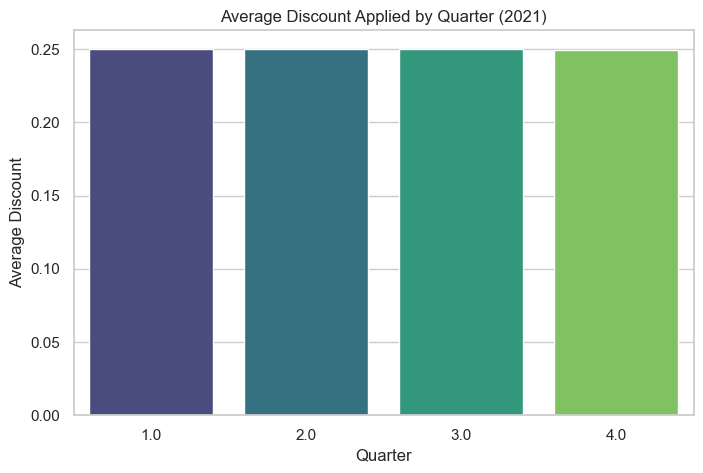

Average Basket Size (Items per Transaction) by Quarter for 2021:
   quarter  avg_items_per_transaction
0      1.0                   5.493322
1      2.0                   5.498755
2      3.0                   5.503448
3      4.0                   5.504196




C:\Users\user\AppData\Local\Temp\ipykernel_24512\483826654.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='avg_items_per_transaction', data=basket_size_by_quarter, palette='coolwarm')


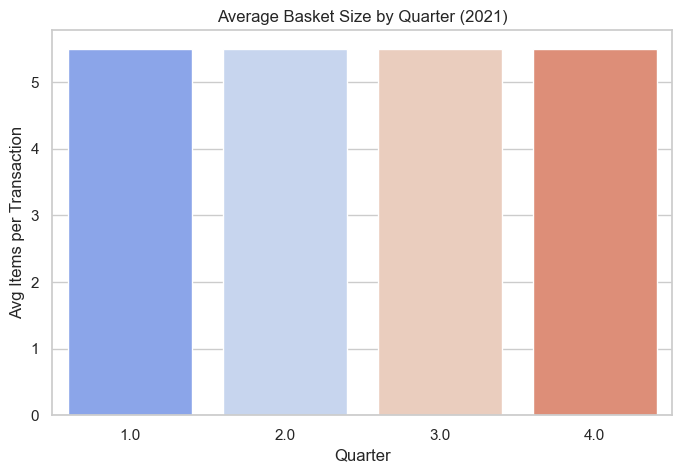

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------------
# Assumption: df is your main DataFrame and it already has the following:
# - transaction_date (datetime)
# - year (extracted from transaction_date)
# - quarter (extracted from transaction_date, e.g., using df['quarter'] = df['transaction_date'].dt.quarter)
# ---------------------------------------------------------------------

# For this analysis, we filter for the year 2021.
df_2021 = retail_data[retail_data['year'] == 2021].copy()

# =============================
# 1. Cohort Analysis: New vs. Returning Customers
# =============================

# For each customer, find the first transaction date in 2021.
df_2021['first_transaction_date'] = df_2021.groupby('customer_id')['transaction_date'].transform('min')
df_2021['first_quarter'] = df_2021['first_transaction_date'].dt.quarter

# Label each transaction as 'new' if the quarter equals the customer's first quarter, otherwise 'returning'.
df_2021['customer_type'] = df_2021.apply(lambda row: 'new' if row['quarter'] == row['first_quarter'] else 'returning', axis=1)

# Group by quarter and customer type to count unique customers.
cohort_summary = df_2021.groupby(['quarter', 'customer_type'])['customer_id'].nunique().reset_index()
cohort_summary = cohort_summary.rename(columns={'customer_id': 'unique_customers'})
print("Cohort Analysis (New vs. Returning Customers) by Quarter for 2021:")
print(cohort_summary)
print("\n")

# =============================
# 2. Channel Performance: Online vs. In-Store Sales
# =============================

# Ensure that the columns 'online_purchases' and 'in_store_purchases' are numeric.
# (If these columns represent counts, they should be summed.)
channel_sales = df_2021.groupby('quarter').agg({
    'online_purchases': 'sum',
    'in_store_purchases': 'sum'
}).reset_index()
print("Channel Sales (Online and In-Store) by Quarter for 2021:")
print(channel_sales)
print("\n")

# =============================
# 3. Marketing/Promotion Analysis: Average Discount by Quarter
# =============================

avg_discount_by_quarter = df_2021.groupby('quarter')['discount_applied'].mean().reset_index()
print("Average Discount Applied by Quarter for 2021:")
print(avg_discount_by_quarter)
print("\n")

# Optional: Plot average discount by quarter.
plt.figure(figsize=(8, 5))
sns.barplot(x='quarter', y='discount_applied', data=avg_discount_by_quarter, palette='viridis')
plt.title("Average Discount Applied by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Average Discount")
plt.show()

# =============================
# 5. Basket Size Analysis: Average Items per Transaction by Quarter
# =============================

basket_size_by_quarter = df_2021.groupby('quarter')['avg_items_per_transaction'].mean().reset_index()
print("Average Basket Size (Items per Transaction) by Quarter for 2021:")
print(basket_size_by_quarter)
print("\n")

# Optional: Plot basket size by quarter.
plt.figure(figsize=(8, 5))
sns.barplot(x='quarter', y='avg_items_per_transaction', data=basket_size_by_quarter, palette='coolwarm')
plt.title("Average Basket Size by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Avg Items per Transaction")
plt.show()


Average Website Visits and Social Media Engagement by Quarter for 2021:
   quarter  website_visits social_media_engagement
0      1.0       49.494105                  medium
1      2.0       49.488988                  medium
2      3.0       49.353892                  medium
3      4.0       49.651177                  medium


C:\Users\user\AppData\Local\Temp\ipykernel_24512\1753955760.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='website_visits', data=engagement_by_quarter, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_24512\1753955760.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='social_media_engagement', data=engagement_by_quarter, palette='Greens_d')


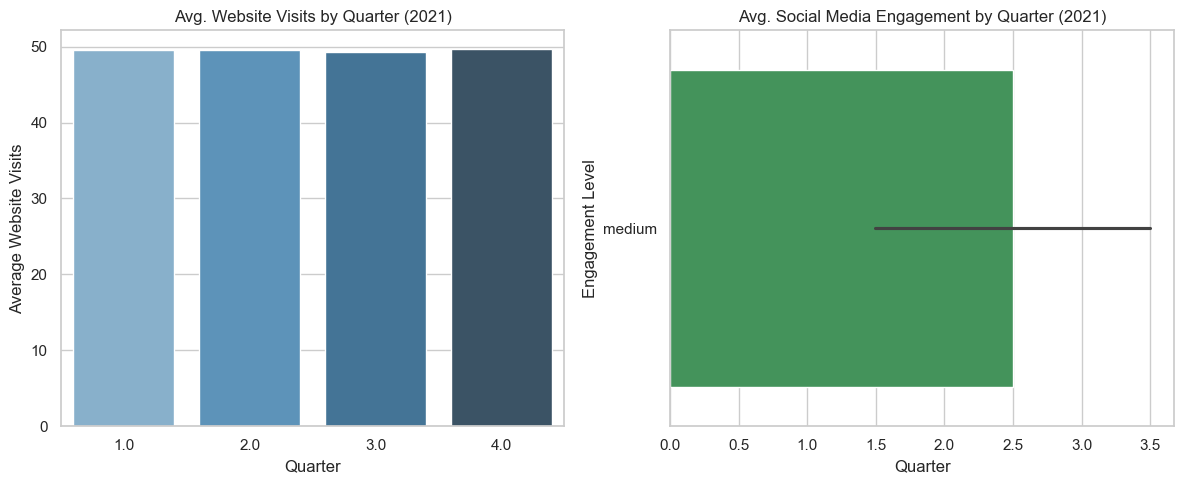

In [29]:
engagement_mapping = {'low': 1, 'medium': 2, 'high': 3}
df_2021['social_media_engagement'] = df_2021['social_media_engagement'].map(engagement_mapping)

# Calculate average website visits and engagement by quarter
engagement_by_quarter = df_2021.groupby('quarter').agg({
    'website_visits': 'mean',
    'social_media_engagement': 'mean'  # Now numerical
}).reset_index()

# Convert back to categorical (optional)
def categorize_engagement(value):
    if value < 1.5:
        return 'low'
    elif value < 2.5:
        return 'medium'
    else:
        return 'high'

engagement_by_quarter['social_media_engagement'] = engagement_by_quarter['social_media_engagement'].apply(categorize_engagement)

print("Average Website Visits and Social Media Engagement by Quarter for 2021:")
print(engagement_by_quarter)

# Plot the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='website_visits', data=engagement_by_quarter, palette='Blues_d')
plt.title("Avg. Website Visits by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Average Website Visits")

plt.subplot(1, 2, 2)
sns.barplot(x='quarter', y='social_media_engagement', data=engagement_by_quarter, palette='Greens_d')
plt.title("Avg. Social Media Engagement by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Engagement Level")

plt.tight_layout()
plt.show()

Payment Method Distribution by Quarter for 2021:
payment_method  quarter   Cash  Credit Card  Debit Card  Mobile Payment
0                   1.0  29220        29238       29196           29394
1                   2.0  29474        29499       29502           29393
2                   3.0  23117        23218       23102           22707
3                   4.0  29749        29944       29980           29978


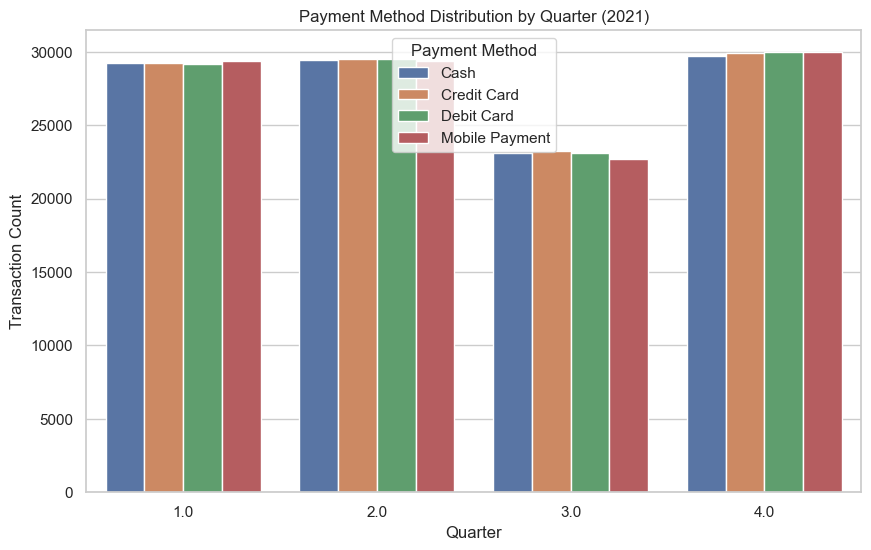

In [30]:
# Group by quarter and payment_method to see the distribution.
df_2021 = retail_data[retail_data['year'] == 2021].copy()
payment_method_distribution = df_2021.groupby('quarter')['payment_method'].value_counts().unstack(fill_value=0).reset_index()

print("Payment Method Distribution by Quarter for 2021:")
print(payment_method_distribution)

# Optional: Plot the payment method distribution for each quarter.
payment_method_distribution_melted = payment_method_distribution.melt(id_vars='quarter', var_name='payment_method', value_name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='count', hue='payment_method', data=payment_method_distribution_melted)
plt.title("Payment Method Distribution by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Transaction Count")
plt.legend(title="Payment Method")
plt.show()


Product Category Performance by Quarter for 2021:
    quarter product_category   total_sales  customer_id
0       1.0         Clothing  1.183613e+08        23314
1       1.0      Electronics  1.182911e+08        23488
2       1.0        Furniture  1.173877e+08        23234
3       1.0        Groceries  1.191655e+08        23583
4       1.0             Toys  1.181709e+08        23429
5       2.0         Clothing  1.197401e+08        23690
6       2.0      Electronics  1.189014e+08        23460
7       2.0        Furniture  1.186732e+08        23417
8       2.0        Groceries  1.186673e+08        23582
9       2.0             Toys  1.195055e+08        23719
10      3.0         Clothing  9.288859e+07        18391
11      3.0      Electronics  9.344777e+07        18368
12      3.0        Furniture  9.446759e+07        18486
13      3.0        Groceries  9.283465e+07        18411
14      3.0             Toys  9.320041e+07        18488
15      4.0         Clothing  1.208261e+08        2398

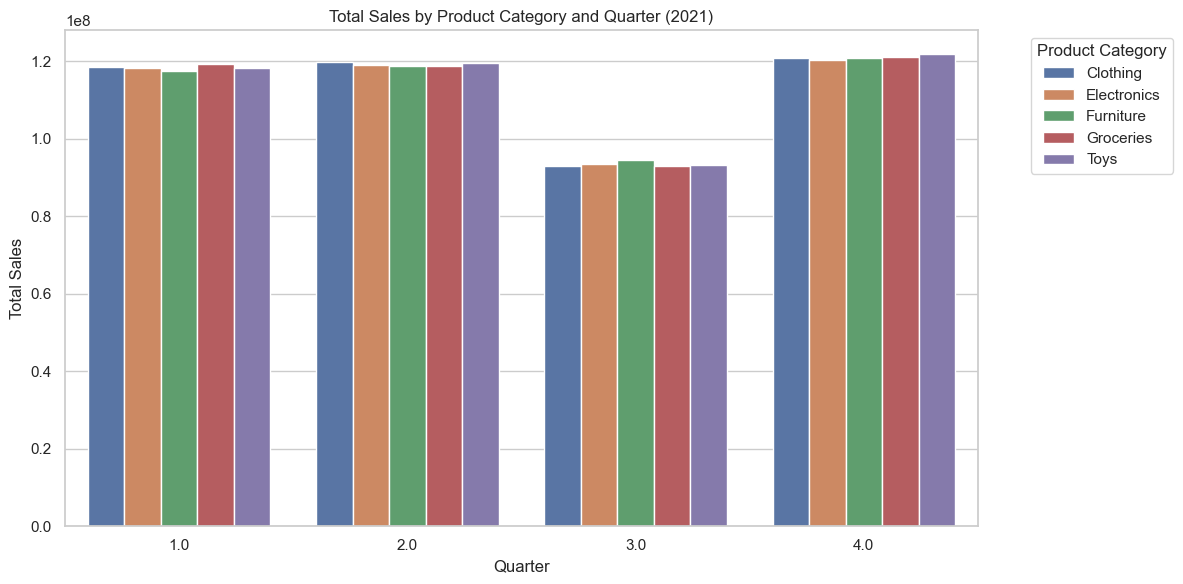

In [31]:
# Group by quarter and product_category; sum the total sales.
product_category_performance = df_2021.groupby(['quarter', 'product_category']).agg({
    'total_sales': 'sum',
    'customer_id': 'nunique'  # Count of unique customers for each category.
}).reset_index()

print("Product Category Performance by Quarter for 2021:")
print(product_category_performance)

# Optional: Plot the total sales for each product category by quarter.
plt.figure(figsize=(12, 6))
sns.barplot(x='quarter', y='total_sales', hue='product_category', data=product_category_performance)
plt.title("Total Sales by Product Category and Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Conversion Rate Data by Quarter for 2021:
   quarter  transaction_count  total_website_visits  conversion_rate
0      1.0             118566               5868823         2.020269
1      2.0             118259               5860666         2.017842
2      3.0              91725               4548676         2.016521
3      4.0             119724               5923081         2.021313


C:\Users\user\AppData\Local\Temp\ipykernel_24512\157177961.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='conversion_rate', data=conversion_rate_data, palette='viridis')


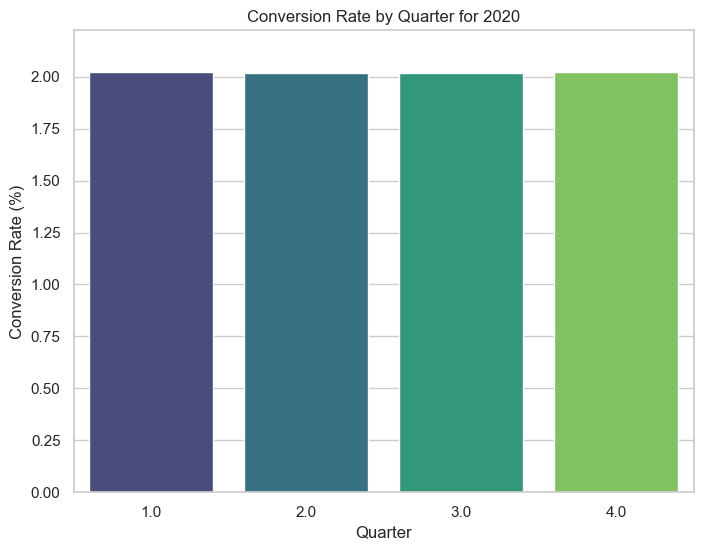

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Aggregate Data by Quarter ---
# Count the number of transactions and sum the website visits for each quarter.
# Here we assume each row is a transaction.
conversion_rate_data = df_2020.groupby('quarter').agg(
    transaction_count=('transaction_id', 'count'),  # Count of transactions in the quarter
    total_website_visits=('website_visits', 'sum')    # Sum of website visits in the quarter
).reset_index()

# --- Step 3: Calculate Conversion Rate ---
# Conversion Rate = (Number of Transactions / Total Website Visits) * 100
conversion_rate_data['conversion_rate'] = (conversion_rate_data['transaction_count'] / conversion_rate_data['total_website_visits']) * 100

# Print the conversion rate data for review.
print("Conversion Rate Data by Quarter for 2021:")
print(conversion_rate_data)

# --- Step 4: Plot the Conversion Rate by Quarter ---
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='conversion_rate', data=conversion_rate_data, palette='viridis')
plt.title("Conversion Rate by Quarter for 2020")
plt.xlabel("Quarter")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, conversion_rate_data['conversion_rate'].max() * 1.1)  # A little headroom on the y-axis
plt.show()


Conversion Rate Data by Quarter for 2021:
   quarter  transaction_count  total_website_visits  conversion_rate
0      1.0             117048               5793186         2.020443
1      2.0             117868               5833168         2.020652
2      3.0              92144               4547665         2.026183
3      4.0             119651               5940813         2.014051


C:\Users\user\AppData\Local\Temp\ipykernel_24512\3344978823.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='conversion_rate', data=conversion_rate_data, palette='viridis')


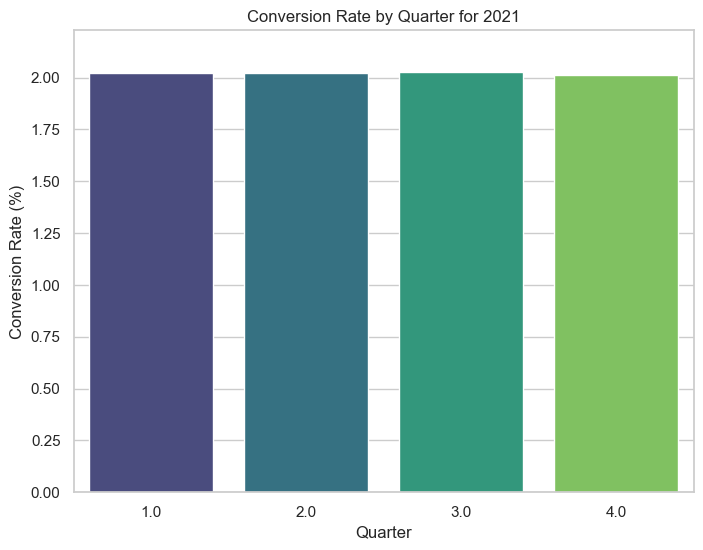

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Aggregate Data by Quarter ---
# Count the number of transactions and sum the website visits for each quarter.
# Here we assume each row is a transaction.
conversion_rate_data = df_2021.groupby('quarter').agg(
    transaction_count=('transaction_id', 'count'),  # Count of transactions in the quarter
    total_website_visits=('website_visits', 'sum')    # Sum of website visits in the quarter
).reset_index()

# --- Step 3: Calculate Conversion Rate ---
# Conversion Rate = (Number of Transactions / Total Website Visits) * 100
conversion_rate_data['conversion_rate'] = (conversion_rate_data['transaction_count'] / conversion_rate_data['total_website_visits']) * 100

# Print the conversion rate data for review.
print("Conversion Rate Data by Quarter for 2021:")
print(conversion_rate_data)

# --- Step 4: Plot the Conversion Rate by Quarter ---
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='conversion_rate', data=conversion_rate_data, palette='viridis')
plt.title("Conversion Rate by Quarter for 2021")
plt.xlabel("Quarter")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, conversion_rate_data['conversion_rate'].max() * 1.1)  # A little headroom on the y-axis
plt.show()


Average Customer Support Calls per Transaction by Quarter for 2021:
   quarter  avg_support_calls_per_transaction
0      1.0                           9.517933
1      2.0                           9.502418
2      3.0                           9.512871
3      4.0                           9.497622

Total Customer Support Calls by Quarter for 2021:
   quarter  total_support_calls
0      1.0              1114055
1      2.0              1120031
2      3.0               876554
3      4.0              1136400


C:\Users\user\AppData\Local\Temp\ipykernel_24512\3200341054.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='avg_support_calls_per_transaction', data=support_calls_avg, palette='coolwarm')


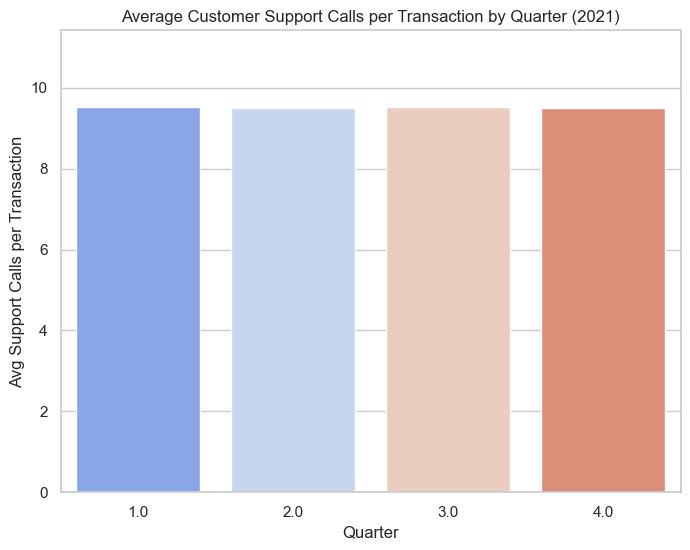

C:\Users\user\AppData\Local\Temp\ipykernel_24512\3200341054.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='total_support_calls', data=support_calls_total, palette='coolwarm')


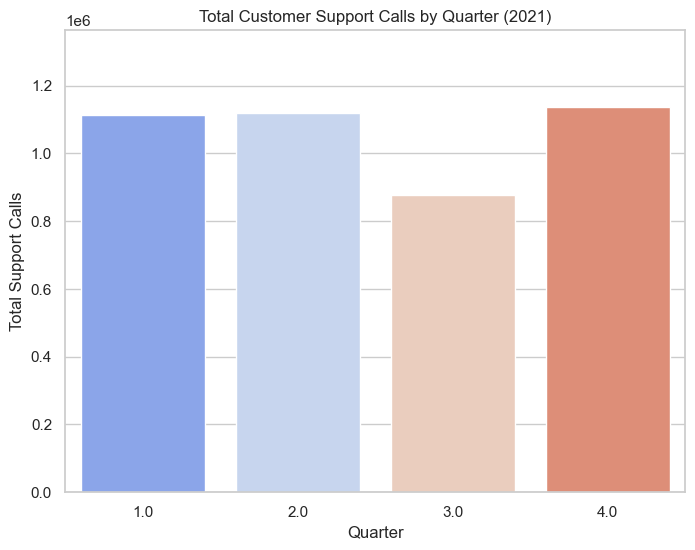

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# Step 1: Aggregate Customer Support Calls by Quarter
# ----------------------------------
# Option A: Average support calls per transaction.
support_calls_avg = df_2021.groupby('quarter')['customer_support_calls'].mean().reset_index()
support_calls_avg.rename(columns={'customer_support_calls': 'avg_support_calls_per_transaction'}, inplace=True)
print("Average Customer Support Calls per Transaction by Quarter for 2021:")
print(support_calls_avg)

# Option B: Total support calls in each quarter (if that is also of interest).
support_calls_total = df_2021.groupby('quarter')['customer_support_calls'].sum().reset_index()
support_calls_total.rename(columns={'customer_support_calls': 'total_support_calls'}, inplace=True)
print("\nTotal Customer Support Calls by Quarter for 2021:")
print(support_calls_total)

# ----------------------------------
# Step 2: Visualize the Results
# ----------------------------------
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='avg_support_calls_per_transaction', data=support_calls_avg, palette='coolwarm')
plt.title("Average Customer Support Calls per Transaction by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Avg Support Calls per Transaction")
plt.ylim(0, support_calls_avg['avg_support_calls_per_transaction'].max() * 1.2)  # Add some headroom
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='total_support_calls', data=support_calls_total, palette='coolwarm')
plt.title("Total Customer Support Calls by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Total Support Calls")
plt.ylim(0, support_calls_total['total_support_calls'].max() * 1.2)  # Add some headroom
plt.show()


In [35]:
import pandas as pd

# Group the data by quarter and calculate the desired metrics.
purchase_returns_summary = df_2021.groupby('quarter').agg(
    avg_purchase_value = ('avg_purchase_value', 'mean'),
    total_returned_items = ('total_returned_items', 'sum'),
    total_returned_value = ('total_returned_value', 'sum')
).reset_index()

print("Purchase and Returns Summary by Quarter for 2021:")
print(purchase_returns_summary)


Purchase and Returns Summary by Quarter for 2021:
   quarter  avg_purchase_value  total_returned_items  total_returned_value
0      1.0          254.960341                527404           58693852.78
1      2.0          254.247415                529181           59138285.88
2      3.0          255.608686                413841           46053816.76
3      4.0          254.516377                537856           59787161.95


Promotion Type Analysis by Quarter for 2021:
    quarter        promotion_type  transaction_count   total_sales
0       1.0               20% Off              38920  1.964708e+08
1       1.0  Buy One Get One Free              39360  1.990318e+08
2       1.0            Flash Sale              38768  1.958740e+08
3       2.0               20% Off              39448  2.000470e+08
4       2.0  Buy One Get One Free              39267  1.982834e+08
5       2.0            Flash Sale              39153  1.971571e+08
6       3.0               20% Off              30800  1.562443e+08
7       3.0  Buy One Get One Free              30704  1.548453e+08
8       3.0            Flash Sale              30640  1.557494e+08
9       4.0               20% Off              39787  2.008281e+08
10      4.0  Buy One Get One Free              40096  2.035914e+08
11      4.0            Flash Sale              39768  2.001488e+08

Promotion Type Breakdown by Quarter (Percentage):
   quarter   20% Off  Buy One Get

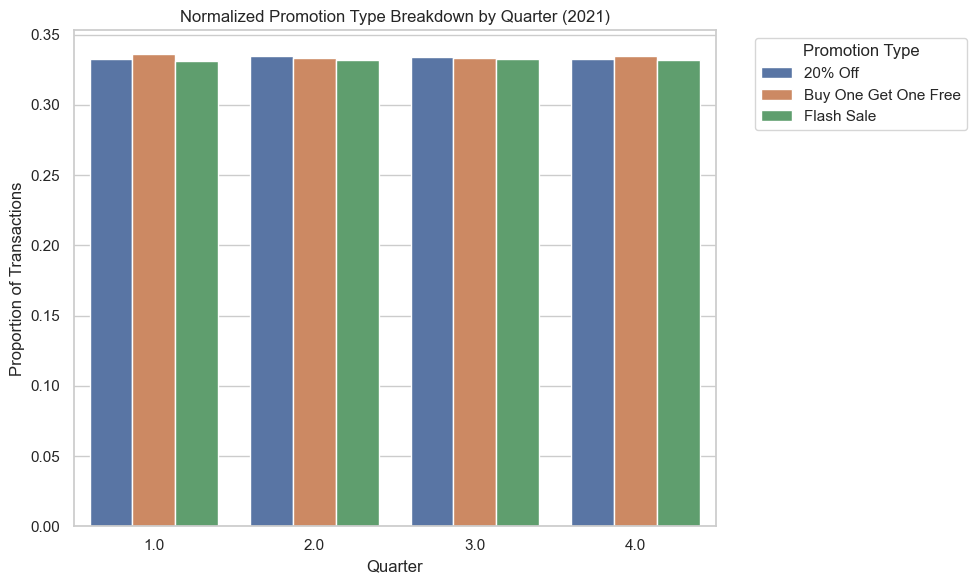


Transaction Counts by Season and Quarter for 2021:
season  quarter   Fall  Spring  Summer  Winter
0           1.0  29119   29365   29236   29328
1           2.0  29449   29537   29322   29560
2           3.0  23124   22893   23013   23114
3           4.0  30195   29764   29775   29917


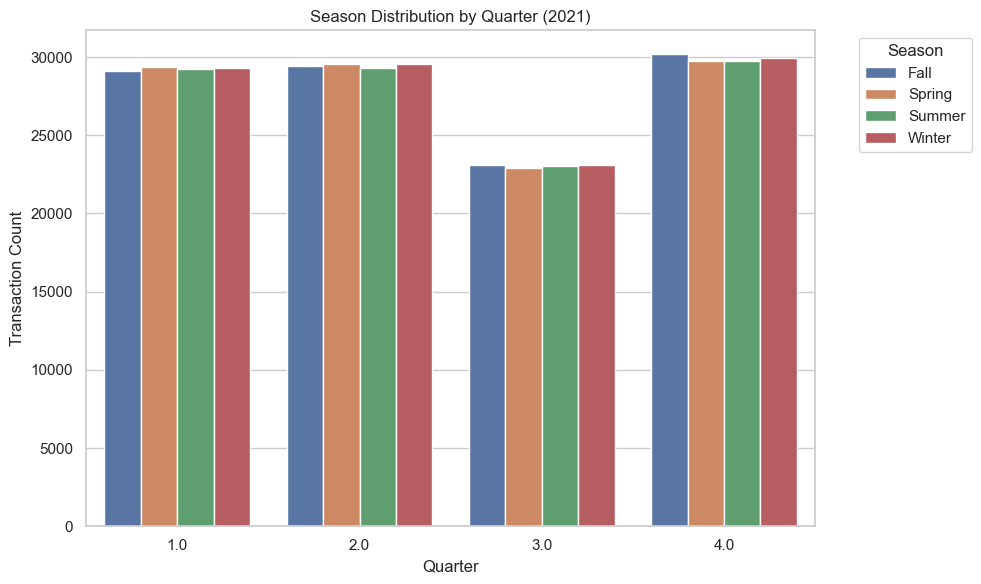


Holiday Season Transaction Counts by Quarter for 2021:
holiday_season  quarter  holiday_no_count  holiday_yes_count
0                   1.0             58539              58509
1                   2.0             58816              59052
2                   3.0             45993              46151
3                   4.0             59724              59927


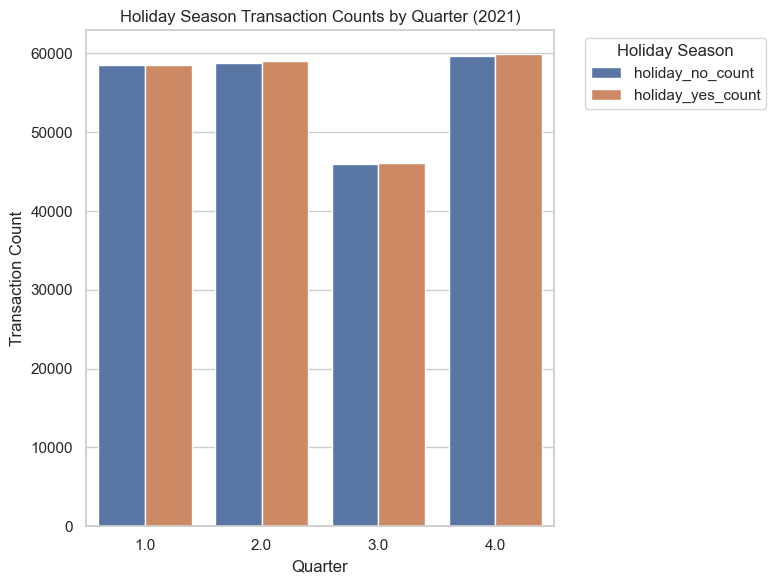

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (a) Aggregate transaction counts and total sales by quarter and promotion_type.
promo_analysis = df_2021.groupby(['quarter', 'promotion_type']).agg(
    transaction_count=('transaction_id', 'count'),
    total_sales=('total_sales', 'sum')
).reset_index()

print("Promotion Type Analysis by Quarter for 2021:")
print(promo_analysis)

# (b) Create a normalized breakdown of promotion types per quarter.
promo_breakdown = (
    df_2021.groupby('quarter')['promotion_type']
           .value_counts(normalize=True)
           .unstack(fill_value=0)
           .reset_index()
)
promo_breakdown.columns.name = None  # Remove the index name
print("\nPromotion Type Breakdown by Quarter (Percentage):")
print(promo_breakdown)

# Optional: Visualize the normalized breakdown.
promo_breakdown_melted = promo_breakdown.melt(id_vars='quarter', var_name='promotion_type', value_name='percentage')
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='percentage', hue='promotion_type', data=promo_breakdown_melted)
plt.title("Normalized Promotion Type Breakdown by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Transactions")
plt.legend(title="Promotion Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# 2. Season Analysis by Quarter
# ============================================
# Create a crosstab to show the count of transactions per season for each quarter.
season_crosstab = pd.crosstab(df_2021['quarter'], df_2021['season'])
season_crosstab = season_crosstab.reset_index()
print("\nTransaction Counts by Season and Quarter for 2021:")
print(season_crosstab)

# Optional: Visualize the season distribution.
season_crosstab_melted = season_crosstab.melt(id_vars='quarter', var_name='season', value_name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='count', hue='season', data=season_crosstab_melted)
plt.title("Season Distribution by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Transaction Count")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================
# 3. Holiday Season Analysis by Quarter
# ============================================
# Standardize the holiday_season column.
df_2021['holiday_season'] = df_2021['holiday_season'].astype(str).str.lower().str.strip()

# Create a crosstab for holiday_season counts by quarter.
holiday_crosstab = pd.crosstab(df_2021['quarter'], df_2021['holiday_season'])
holiday_crosstab = holiday_crosstab.reset_index()
holiday_crosstab = holiday_crosstab.rename(columns={'yes': 'holiday_yes_count', 'no': 'holiday_no_count'})
print("\nHoliday Season Transaction Counts by Quarter for 2021:")
print(holiday_crosstab)

# Optional: Visualize the holiday season counts.
holiday_crosstab_melted = holiday_crosstab.melt(id_vars='quarter', var_name='holiday_season', value_name='count')
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='count', hue='holiday_season', data=holiday_crosstab_melted)
plt.title("Holiday Season Transaction Counts by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Transaction Count")
plt.legend(title="Holiday Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_24512\2300655040.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quarter', y='daily_transactions', data=daily_counts, palette='Set2')


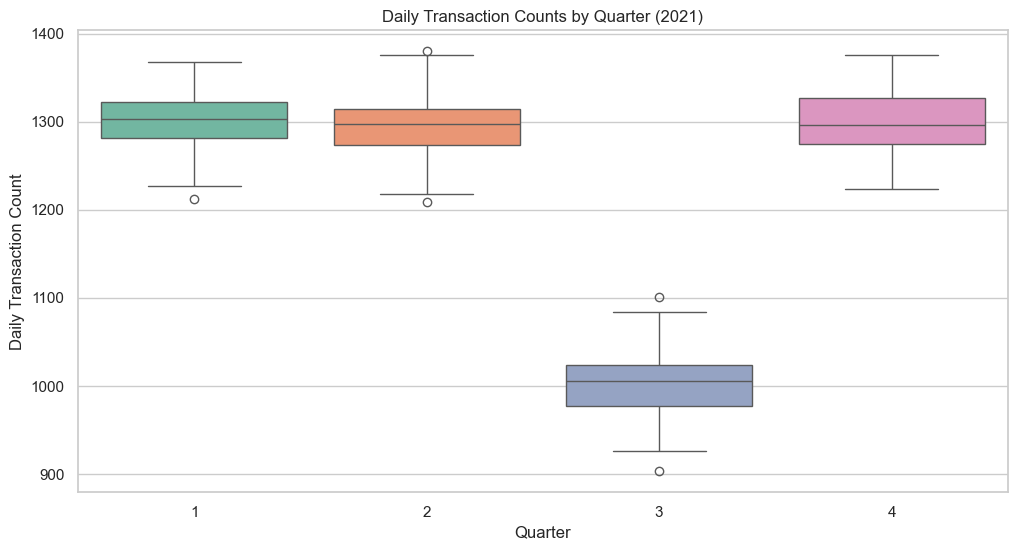

ANOVA F-value: 1603.6522800145872
ANOVA p-value: 3.02910435835694e-208


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Create a daily transaction count
daily_counts = df_2021.groupby(df_2021['transaction_date'].dt.date).size().reset_index(name='daily_transactions')
daily_counts['date'] = pd.to_datetime(daily_counts['transaction_date'])
daily_counts['quarter'] = daily_counts['date'].dt.quarter

# Plot daily transaction counts by quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='daily_transactions', data=daily_counts, palette='Set2')
plt.title("Daily Transaction Counts by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Daily Transaction Count")
plt.show()

# Prepare groups for ANOVA
q1 = daily_counts[daily_counts['quarter'] == 1]['daily_transactions']
q2 = daily_counts[daily_counts['quarter'] == 2]['daily_transactions']
q3 = daily_counts[daily_counts['quarter'] == 3]['daily_transactions']
q4 = daily_counts[daily_counts['quarter'] == 4]['daily_transactions']

# Perform one-way ANOVA to test if the mean daily transactions differ by quarter
F, p = stats.f_oneway(q1, q2, q3, q4)
print("ANOVA F-value:", F)
print("ANOVA p-value:", p)


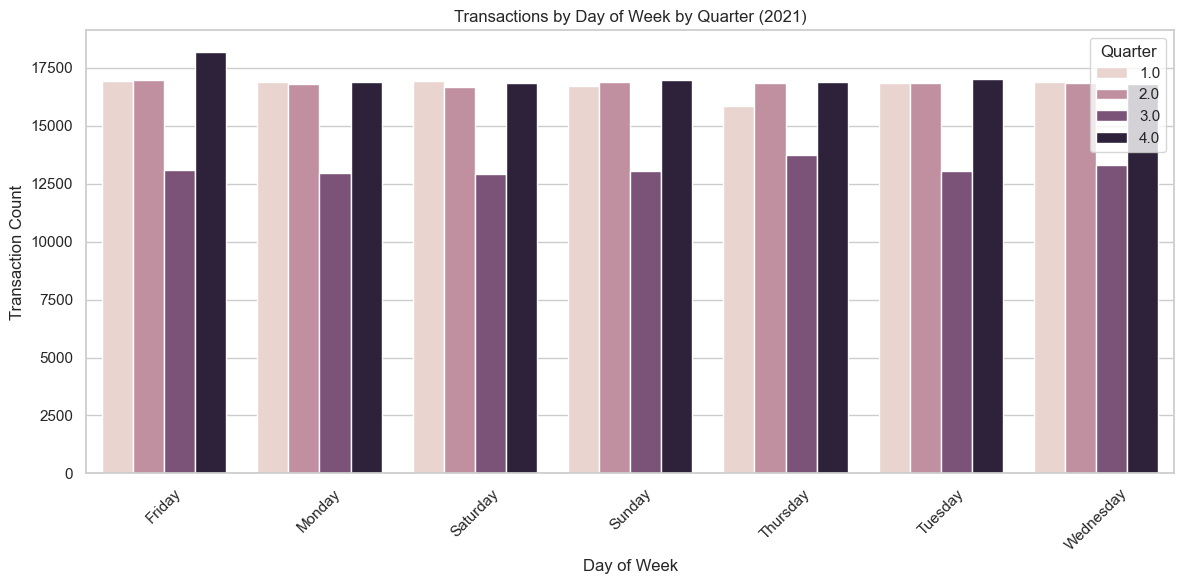

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract day-of-week and hour-of-day from transaction_date
df_2021['day_of_week'] = df_2021['transaction_date'].dt.day_name()
df_2021['hour_of_day'] = df_2021['transaction_date'].dt.hour

# 1a. Analyze the distribution of transactions by day-of-week for each quarter.
day_of_week_summary = df_2021.groupby(['quarter', 'day_of_week']).size().reset_index(name='transaction_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='transaction_count', hue='quarter', data=day_of_week_summary)
plt.title("Transactions by Day of Week by Quarter (2021)")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.legend(title="Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Age by Quarter:
   quarter        age
0      1.0  48.439341
1      2.0  48.493433
2      3.0  48.496842
3      4.0  48.502102


C:\Users\user\AppData\Local\Temp\ipykernel_24512\2018944948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='age', data=avg_age, palette='pastel')


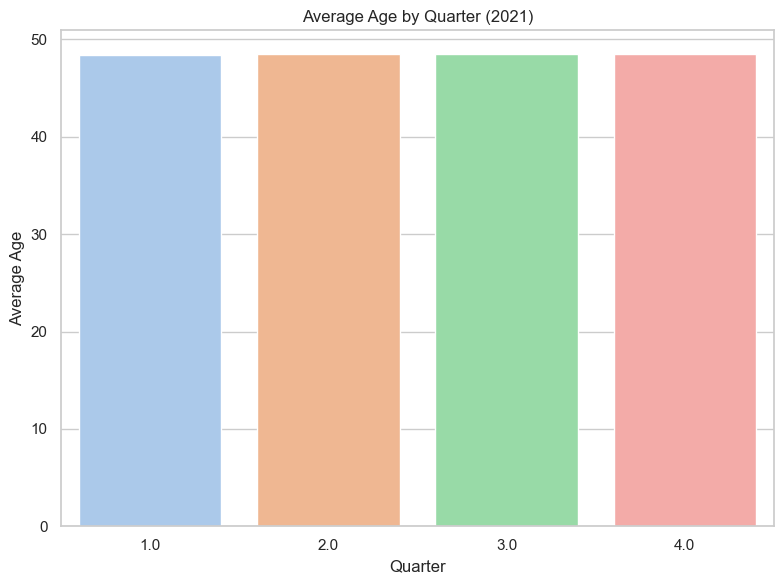

In [39]:
# Compute the average age of customers in each quarter.
avg_age = df_2021.groupby('quarter')['age'].mean().reset_index()
print("Average Age by Quarter:")
print(avg_age)

# Visualize average age by quarter.
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='age', data=avg_age, palette='pastel')
plt.title("Average Age by Quarter (2021)")
plt.xlabel("Quarter")
plt.ylabel("Average Age")
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
# --------------------------------------------
# Step 1: Create the Age Group Column
# --------------------------------------------
def categorize_age(age):
    if age < 20:
        return "<20"
    elif age <= 60:
        return "20-60"
    else:
        return "60+"

df_2021['age_group'] = df_2021['age'].apply(categorize_age)

# --------------------------------------------
# Step 2: Aggregate Total Sales by Quarter and Age Group
# --------------------------------------------
sales_by_age = df_2021.groupby(['quarter', 'age_group'])['total_sales'].sum().reset_index()

print("Total Sales by Quarter and Age Group for 2021:")
print(sales_by_age)

# --------------------------------------------
# Step 3: For Each Quarter, Identify the Age Group with the Highest Total Sales
# --------------------------------------------
# We use groupby and idxmax to select the row with maximum total_sales for each quarter.
highest_sales_by_quarter = sales_by_age.loc[sales_by_age.groupby('quarter')['total_sales'].idxmax()].reset_index(drop=True)

print("\nHighest Total Sales by Age Group for Each Quarter in 2021:")
print(highest_sales_by_quarter)


Total Sales by Quarter and Age Group for 2021:
    quarter age_group   total_sales
0       1.0     20-60  3.916559e+08
1       1.0       60+  1.809618e+08
2       1.0       <20  1.875889e+07
3       2.0     20-60  3.944893e+08
4       2.0       60+  1.816190e+08
5       2.0       <20  1.937933e+07
6       3.0     20-60  3.088223e+08
7       3.0       60+  1.425417e+08
8       3.0       <20  1.547501e+07
9       4.0     20-60  3.995497e+08
10      4.0       60+  1.853592e+08
11      4.0       <20  1.965937e+07

Highest Total Sales by Age Group for Each Quarter in 2021:
   quarter age_group   total_sales
0      1.0     20-60  3.916559e+08
1      2.0     20-60  3.944893e+08
2      3.0     20-60  3.088223e+08
3      4.0     20-60  3.995497e+08


In [41]:
import pandas as pd
import numpy as np

# ---------------------------
# Step 3: Aggregate Total Sales by Quarter
# ---------------------------
# Assuming total_sales represents the total sales per transaction (or customer) and we want to sum these by quarter.
quarterly_sales = df_2021.groupby('quarter')['total_sales'].sum().reset_index()
print("Quarterly Sales for 2021:")
print(quarterly_sales)

# ---------------------------
# Step 4: Compute Overall Mean and Standard Deviation of Quarterly Sales
# ---------------------------
overall_mean = quarterly_sales['total_sales'].mean()
overall_std = quarterly_sales['total_sales'].std(ddof=1)  # Using sample standard deviation

# ---------------------------
# Step 5: Extract Q3 Total Sales and Compute Difference
# ---------------------------
q3_sales = quarterly_sales.loc[quarterly_sales['quarter'] == 3, 'total_sales'].values[0]
difference = overall_mean - q3_sales
std_deviation_difference = difference / overall_std

# ---------------------------
# Step 6: Display the Results
# ---------------------------
print("\nOverall Mean Total Sales:", overall_mean)
print("Overall Standard Deviation:", overall_std)
print("Q3 Total Sales:", q3_sales)
print("Difference (Overall Mean - Q3 Total Sales):", difference)
print("Difference in Standard Deviations:", std_deviation_difference)


Quarterly Sales for 2021:
   quarter   total_sales
0      1.0  5.913765e+08
1      2.0  5.954876e+08
2      3.0  4.668390e+08
3      4.0  6.045683e+08

Overall Mean Total Sales: 564567839.0324999
Overall Standard Deviation: 65385245.71010771
Q3 Total Sales: 466839016.73
Difference (Overall Mean - Q3 Total Sales): 97728822.30249989
Difference in Standard Deviations: 1.494661696857282


In [42]:
# Standardize the loyalty_program column.
df_2021['loyalty_program'] = df_2021['loyalty_program'].astype(str).str.lower().str.strip()

# Create a flag for loyalty members.
df_2021['is_loyal'] = (df_2021['loyalty_program'] == 'yes').astype(int)

# Aggregate performance metrics by loyalty status and quarter.
loyalty_performance = df_2021.groupby(['quarter', 'is_loyal']).agg(
    unique_customers=('customer_id', 'nunique'),
    total_sales=('total_sales', 'sum'),
    avg_transaction_value=('avg_transaction_value', 'mean')
).reset_index()

print("Loyalty Program Performance by Quarter:")
print(loyalty_performance)


Loyalty Program Performance by Quarter:
   quarter  is_loyal  unique_customers   total_sales  avg_transaction_value
0      1.0         0             58536  2.950809e+08             254.479531
1      1.0         1             58512  2.962957e+08             255.133236
2      2.0         0             59121  2.989542e+08             255.482417
3      2.0         1             58747  2.965333e+08             255.608856
4      3.0         0             46125  2.338431e+08             254.266122
5      3.0         1             46019  2.329960e+08             255.615848
6      4.0         0             59927  3.027270e+08             254.348124
7      4.0         1             59724  3.018412e+08             255.051111


In [43]:
# Standardize the loyalty_program column.
df_2020['loyalty_program'] = df_2020['loyalty_program'].astype(str).str.lower().str.strip()

# Create a flag for loyalty members.
df_2020['is_loyal'] = (df_2020['loyalty_program'] == 'yes').astype(int)

# Aggregate performance metrics by loyalty status and quarter.
loyalty_performance = df_2020.groupby(['quarter', 'is_loyal']).agg(
    unique_customers=('customer_id', 'nunique'),
    total_sales=('total_sales', 'sum'),
    avg_transaction_value=('avg_transaction_value', 'mean')
).reset_index()

print("Loyalty Program Performance by Quarter:")
print(loyalty_performance)


Loyalty Program Performance by Quarter:
   quarter  is_loyal  unique_customers   total_sales  avg_transaction_value
0      1.0         0             59148  2.996022e+08             255.042627
1      1.0         1             59418  3.001715e+08             255.526578
2      2.0         0             59157  2.987701e+08             254.563090
3      2.0         1             59102  2.994489e+08             255.264974
4      3.0         0             45860  2.322198e+08             256.096407
5      3.0         1             45865  2.319433e+08             254.702608
6      4.0         0             59959  3.022750e+08             253.731207
7      4.0         1             59765  3.015630e+08             255.121648


In [44]:
# Create an age group variable.
def categorize_age(age):
    if age < 20:
        return "<20"
    elif age <= 60:
        return "20-60"
    else:
        return "60+"

df_2021['age_group'] = df_2021['age'].apply(categorize_age)

# Aggregate unique customer counts and total sales by quarter, income bracket, and age group.
segment_summary = df_2021.groupby(['quarter', 'income_bracket', 'age_group']).agg(
    unique_customers=('customer_id', 'nunique'),
    total_sales=('total_sales', 'sum')
).reset_index()

print("Segment Summary by Quarter, Income Bracket, and Age Group:")
print(segment_summary)


Segment Summary by Quarter, Income Bracket, and Age Group:
    quarter income_bracket age_group  unique_customers   total_sales
0       1.0           high     20-60             25720  1.294005e+08
1       1.0           high       60+             12006  6.087510e+07
2       1.0           high       <20              1242  6.204787e+06
3       1.0            low     20-60             25968  1.315437e+08
4       1.0            low       60+             11858  6.027207e+07
5       1.0            low       <20              1256  6.283086e+06
6       1.0         medium     20-60             25887  1.307117e+08
7       1.0         medium       60+             11869  5.981459e+07
8       1.0         medium       <20              1242  6.271014e+06
9       2.0           high     20-60             26378  1.332983e+08
10      2.0           high       60+             12043  6.126037e+07
11      2.0           high       <20              1269  6.504773e+06
12      2.0            low     20-60        